In [1]:
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scienceplots


base_path = "./data/processed_data/"
path_counter = base_path + "counter/"
path_mean_std = base_path + "mean_std/"

base_plot_path = "./plots/"

base_name = "results_{}__{}_{}.pt"

dataset_list = ['c4', 'oscar', 'redpajama', 'wikitext2', 'pile', 'gsm8k', 'svamp', 'mawps', 'anli_r1', 'esnli', 'rte', 'boolq', 'commonsense_qa', 'race',
                'winogrande', 'wmt14', 'iwslt', 'opc', 'ds1000', 'mbpp']


model_list = ['meta-llama/Llama-2-7b-hf', 'mistralai/Mistral-7B-v0.1', 'microsoft/phi-2', 'baichuan-inc/Baichuan-7B', 'Qwen/Qwen2.5-7B' ]
models_names_print = ['Llama', 'Phi', 'Mistral', 'Baichuan', 'Qwen']
model_name = models_names_print #[name.split('/')[1] for name in model_list] #, 'Llama-3.2-1B']
rename_dictionary_model_names = {model_list[i]: models_names_print[i] for i in range(len(model_list))}

dataset_list_print = ['C4', 'OSCAR', 'RedPajama', 'WikiText', 'Pile', 'GSM8K', 'SVAMP', 'MAWPS', 'ANLI', 'e-SNLI', 'RTE', 'BoolQ', 'CommonsenseQA', 'RACE', 'WinoGrande', 'WMT14', 'IWSLT', 'RefineCode', 'DS1000', 'MBPP']
rename_dictionary_dataset = {dataset_list[i]: dataset_list_print[i] for i in range(len(dataset_list))}

plt.style.use('science')

sns.set_context("notebook", rc={
    "axes.linewidth": 0.5,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

In [2]:
#Create a custom color palette for the plot

original_cmap = sns.color_palette("Spectral_r", as_cmap=True) 
colors = np.concatenate((original_cmap(np.linspace(0, 0.35, 4)), original_cmap(np.linspace(0.6, 1, 4))), axis=0) # Extract 10 colors
custom_palette = np.clip(colors, 0, 1) # Ensure valid RGB range
custom_palette = [tuple(c) for c in custom_palette]  # Convert array to list of 


palette_heatmap =  sns.color_palette("Blues", as_cmap=True) 
colors_blues = np.concatenate((palette_heatmap(np.linspace(0, 0.35, 1)), palette_heatmap(np.linspace(0.8, 1, 10))), axis=0) # Extract 10 colors
custom_blues = np.clip(colors_blues, 0, 1) # Ensure valid RGB range
custom_blues = [tuple(c) for c in custom_blues]  # Convert array to list of 

one_color = sns.color_palette("mako", as_cmap=True).colors[190]

In [3]:

results = pd.read_csv("./results.csv")

metric_map = {
    'c4': 'ppl',
    'oscar': 'ppl',
    'redpajama': 'ppl',
    'wikitext2': 'ppl',
    'pile': 'ppl',
    'gsm8k': 'acc',
    'svamp': 'acc',
    'mawps': 'acc',
    'anli_r1': 'acc',
    'esnli': 'acc',
    'rte': 'acc',
    'boolq': 'acc',
    'commonsense_qa': 'acc',
    'race': 'acc',
    'winogrande': 'acc',
    'wmt14': 'bleu',
    'iwslt': 'bleu',
    'opc': 'f1',
    'ds1000': 'f1',
    'mbpp': 'f1',
}

task_map = {
    'none': 'Dense',
    'c4': 'Language Modeling',
    'oscar': 'Language Modeling',
    'redpajama': 'Language Modeling',
    'wikitext2': 'Language Modeling',
    'pile': 'Language Modeling',
    'gsm8k': 'Mathematical Reasoning',
    'svamp': 'Mathematical Reasoning',
    'mawps': 'Mathematical Reasoning',
    'anli_r1': 'NLI',
    'esnli': 'NLI',
    'rte': 'NLI',
    'boolq': 'Question Answering',
    'commonsense_qa': 'Question Answering',
    'race': 'Question Answering',
    'winogrande': 'Question Answering',
    'wmt14': 'Translation',
    'iwslt': 'Translation',
    'opc': 'Coding',
    'ds1000': 'Coding',
    'mbpp': 'Coding',
}

results["dataset_group"] = results["dataset"].map(task_map)
results["pruning_group"] = results["pruning_data"].map(task_map)

order_columns = ['Dense', 'C4', 'OSCAR', 'Pile', 'RedPajama', 'WikiText', 'ANLI', 'BoolQ', 'CommonsenseQA', 'e-SNLI', 'GSM8K', 'MAWPS', 'RACE',  'RTE',   'SVAMP',  'WinoGrande', 'IWSLT',  'WMT14', 'DS1000', 'MBPP', 'RefineCode']
order_columns_grouped = ['Dense', 'Language Modeling', 'Mathematical Reasoning', 'NLI', 'Question Answering', 'Translation', 'Coding']

headers = {
    'selector': 'th.col_heading',
    'props': 'background-color: #5E17EB; color: white;'
}

index_style = {
    'selector': 'th.index_name',
    'props': 'background-color: #5E17EB; color: white;'
}

#none is the dense model
results['pruning_data'] = results['pruning_data'].replace({'none': 'dense'})

results['metric'] = results['dataset'].map(metric_map)
print(results['metric'].unique())

print(results['dataset'].unique())

results['value'] = results.apply(lambda row: row[row['metric']], axis=1)
precision = 3
results['value'] = results['value'].round(precision)

results['model'] = results['model'].replace(rename_dictionary_model_names)
results['dataset'] = results['dataset'].replace(rename_dictionary_dataset)
results['dataset'] = results['dataset'].replace({'dense': 'Dense'})

results['pruning_data'] = results['pruning_data'].replace(rename_dictionary_dataset)
results['pruning_data'] = results['pruning_data'].replace({'dense': 'Dense'})


dictionary_grouped_pruning = {
    'random_sample': 'Random Sampling',
    'prototype_flatten': 'Most Similar Cosine Flattening',
    'prototype_mean': 'Most Similar Cosine Mean',
    'most_different_flatten': 'Most Different Cosine Flattening',
    'most_different_mean': 'Most Different Cosine Mean',
    'all_prototype_iou': 'Most Similar IoU',
    'all_prototype_iou_count_occurrence': 'Most Similar IoU_CF',
    'all_most_different_iou': 'Most Different IoU',
    'all_most_different_iou_count_occurrence': 'Most Different IoU_CF',
    'all_prototype_st': 'Most Similar ST',
    'all_most_different_st': 'Most Different ST'}

results['pruning_data'] = results['pruning_data'].replace(dictionary_grouped_pruning)
results['dataset_group'] = results['dataset_group'].replace(dictionary_grouped_pruning)


results['pruning_data'] = results['pruning_data'].replace({'all_no_general_prototype_flatten': 'No General Most Similar Cosine Flattening', 'all_no_aritm_prototype_flatten': 'No Aritm Most Similar Cosine Flattening', 'all_no_nlu_prototype_flatten': 'No NLU Most Similar Cosine Flattening', 'all_no_commonsense_prototype_flatten': 'No Commonsense Most Similar Cosine Flattening', 'all_no_translation_prototype_flatten': 'No Translation Most Similar Cosine Flattening', 'all_no_coding_prototype_flatten': 'No Coding Most Similar Cosine Flattening'})


['acc' 'ppl' 'f1' 'bleu']
['anli_r1' 'boolq' 'c4' 'commonsense_qa' 'ds1000' 'esnli' 'gsm8k' 'iwslt'
 'mawps' 'mbpp' 'opc' 'oscar' 'pile' 'race' 'redpajama' 'rte' 'svamp'
 'wikitext2' 'winogrande' 'wmt14']


In [4]:
"""#Group bymodel, sparsity, pruning_data, datset -> if there are multiple values for the same pruning_data and dataset, return an error

print(len(results))
grouped = results.groupby(['model', 'sparsity', 'pruning_data', 'dataset']).aggregate({'acc': 'first', 'bleu': 'first', 'ppl': 'first', 'f1': 'first'}).reset_index()
print(grouped)

#'DataFrameGroupBy' object has no attribute 'to_csv'

grouped.to_csv('unique_results.csv', index=False)"""

"#Group bymodel, sparsity, pruning_data, datset -> if there are multiple values for the same pruning_data and dataset, return an error\n\nprint(len(results))\ngrouped = results.groupby(['model', 'sparsity', 'pruning_data', 'dataset']).aggregate({'acc': 'first', 'bleu': 'first', 'ppl': 'first', 'f1': 'first'}).reset_index()\nprint(grouped)\n\n#'DataFrameGroupBy' object has no attribute 'to_csv'\n\ngrouped.to_csv('unique_results.csv', index=False)"

In [5]:
def generate_table(data, metric, highlight_min=False, order_columns=order_columns):
    data_metric = data[data['metric'] == metric]
    
    pivot_table = (
        pd.pivot_table(data = data_metric.round(precision),
            columns='pruning_data',
            index='dataset',
            values='value'
            ).reindex(order_columns, axis=1)
    )
    
    #print(pivot_table.style.format(precision=3).to_latex())
    
    if highlight_min:
        pivot_style = (
            pivot_table
                .style
                    .set_table_styles([headers,index_style])
                    .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
                    .highlight_min(order_columns[1:], axis=1, color="yellow")
                    .highlight_min(axis=1, color="red")
                    .format(precision=precision)
        )
    else:
        pivot_style = (
            pivot_table
                .style
                    .set_table_styles([headers,index_style])
                    .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
                    .highlight_max(order_columns[1:], axis=1, color="yellow")
                    .highlight_max(axis=1, color="red")
                    .format(precision=precision)
        )
    
    return pivot_style

In [6]:
for i in range(len(models_names_print)):
    
    data_model = results[results['model'] == models_names_print[i]]
    
    tmp_pivot_style_ppl = generate_table(data_model, 'ppl', highlight_min=True)
    tmp_pivot_style_acc = generate_table(data_model, 'acc')
    tmp_pivot_style_bleu = generate_table(data_model, 'bleu')
    tmp_pivot_style_f1 = generate_table(data_model, 'f1')
    
    print(model_name[i] + ": PPL")
    display(tmp_pivot_style_ppl)
    
    display(tmp_pivot_style_acc)
    
    print(model_name[i] + ": BLEU")
    display(tmp_pivot_style_bleu)
    
    print(model_name[i] + ": F1")
    display(tmp_pivot_style_f1)
    
    print("--------------------\n\n\n\n\n")
    


Llama: PPL


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,7.461,9.499,9.534,9.657,9.572,9.636,9.584,9.483,9.969,10.101,9.734,10.165,9.563,9.546,9.881,9.952,9.776,9.703,10.327,10.403,10.287
OSCAR,5.574,6.963,6.846,6.918,6.937,6.880,7.002,6.940,7.165,7.274,7.098,7.321,6.910,6.959,7.179,7.162,7.121,7.079,7.507,7.556,7.506
Pile,4.396,5.323,5.270,5.215,5.280,5.283,5.289,5.282,5.418,5.483,5.349,5.456,5.305,5.310,5.375,5.403,5.382,5.390,5.313,5.350,5.328
RedPajama,6.718,8.092,8.075,8.134,8.036,8.139,8.042,8.032,8.297,8.373,8.182,8.386,8.123,8.064,8.272,8.289,8.210,8.193,8.345,8.391,8.373
WikiText,5.118,6.447,6.460,6.442,6.431,6.307,6.428,6.416,6.732,6.837,6.613,6.797,6.423,6.422,6.676,6.725,6.605,6.543,7.256,7.266,7.249


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,0.363,0.342,0.337,0.345,0.331,0.343,0.355,0.341,0.346,0.355,0.337,0.353,0.344,0.348,0.352,0.353,0.340,0.359,0.349,0.353,0.342
BoolQ,0.271,0.102,0.134,0.217,0.204,0.101,0.283,0.286,0.259,0.284,0.296,0.206,0.282,0.272,0.165,0.305,0.175,0.072,0.213,0.197,0.231
CommonsenseQA,0.492,0.256,0.276,0.269,0.263,0.274,0.262,0.272,0.291,0.254,0.289,0.274,0.303,0.283,0.310,0.324,0.246,0.256,0.283,0.258,0.293
GSM8K,0.013,0.014,0.016,0.016,0.016,0.017,0.011,0.014,0.011,0.013,0.013,0.012,0.013,0.014,0.011,0.011,0.012,0.012,0.017,0.020,0.017
MAWPS,0.360,0.262,0.231,0.244,0.227,0.250,0.192,0.206,0.119,0.102,0.206,0.265,0.188,0.169,0.231,0.113,0.165,0.156,0.263,0.115,0.140
RACE,0.400,0.314,0.312,0.309,0.307,0.284,0.291,0.296,0.306,0.293,0.303,0.307,0.311,0.298,0.310,0.303,0.300,0.300,0.296,0.272,0.290
RTE,0.639,0.477,0.592,0.552,0.570,0.455,0.538,0.534,0.603,0.596,0.549,0.578,0.556,0.542,0.556,0.563,0.603,0.563,0.469,0.451,0.487
SVAMP,0.273,0.173,0.180,0.190,0.180,0.210,0.123,0.170,0.123,0.097,0.173,0.237,0.170,0.140,0.207,0.127,0.147,0.150,0.237,0.177,0.157
WinoGrande,0.485,0.500,0.487,0.485,0.498,0.522,0.496,0.493,0.491,0.500,0.491,0.489,0.495,0.491,0.492,0.496,0.493,0.489,0.500,0.498,0.502


Llama: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,0.274,0.226,0.228,0.230,0.237,0.207,0.234,0.225,0.234,0.232,0.224,0.243,0.215,0.220,0.229,0.234,0.258,0.253,0.226,0.221,0.222
WMT14,0.276,0.219,0.223,0.222,0.228,0.207,0.229,0.218,0.223,0.222,0.220,0.229,0.209,0.217,0.219,0.225,0.249,0.242,0.216,0.208,0.210


Llama: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,0.821,0.810,0.813,0.815,0.813,0.812,0.803,0.809,0.812,0.813,0.813,0.811,0.803,0.803,0.812,0.813,0.808,0.807,0.816,0.815,0.814
MBPP,0.780,0.773,0.775,0.772,0.773,0.773,0.776,0.777,0.773,0.774,0.775,0.776,0.771,0.770,0.776,0.772,0.769,0.769,0.773,0.775,0.775
RefineCode,0.766,0.746,0.744,0.753,0.745,0.749,0.749,0.751,0.749,0.748,0.743,0.742,0.745,0.747,0.747,0.748,0.739,0.737,0.751,0.753,0.754


--------------------





Phi: PPL


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,8.994,11.567,11.654,11.849,11.876,11.851,12.125,11.628,12.421,12.705,12.129,13.204,11.554,11.931,12.412,12.545,12.057,11.841,12.440,12.576,12.382
OSCAR,5.921,7.522,7.495,7.677,7.647,7.674,7.806,7.556,8.020,8.197,7.868,8.453,7.562,7.699,8.030,8.078,7.819,7.738,8.293,8.408,8.268
Pile,4.317,5.222,5.251,5.144,5.277,5.245,5.341,5.238,5.521,5.571,5.417,5.647,5.314,5.321,5.471,5.509,5.375,5.365,5.366,5.413,5.372
RedPajama,6.962,8.622,8.603,8.736,8.514,8.698,8.702,8.606,9.114,9.231,8.965,9.340,8.748,8.724,9.160,9.152,8.880,8.859,9.036,9.231,9.206
WikiText,4.833,6.463,6.480,6.488,6.517,6.158,6.411,6.283,7.054,7.121,6.802,7.380,6.401,6.396,6.934,7.015,6.786,6.692,7.334,7.710,7.556


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,0.407,0.405,0.341,0.408,0.400,0.402,0.388,0.393,0.398,0.357,0.412,0.387,0.372,0.383,0.397,0.399,0.384,0.353,0.334,0.333,0.333
BoolQ,0.354,0.686,0.624,0.590,0.594,0.717,0.616,0.730,0.720,0.633,0.534,0.616,0.689,0.613,0.616,0.748,0.594,0.601,0.572,0.568,0.581
CommonsenseQA,0.713,0.623,0.627,0.630,0.634,0.630,0.636,0.647,0.667,0.646,0.617,0.641,0.647,0.656,0.643,0.631,0.654,0.618,0.625,0.633,0.636
GSM8K,0.014,0.014,0.012,0.012,0.016,0.025,0.014,0.017,0.015,0.017,0.015,0.013,0.013,0.014,0.015,0.013,0.016,0.015,0.029,0.031,0.028
MAWPS,0.583,0.512,0.513,0.535,0.529,0.512,0.523,0.494,0.402,0.388,0.513,0.527,0.475,0.519,0.529,0.398,0.479,0.473,0.531,0.481,0.473
RACE,0.771,0.679,0.696,0.690,0.682,0.687,0.688,0.697,0.707,0.667,0.686,0.661,0.694,0.698,0.690,0.691,0.691,0.690,0.685,0.683,0.687
RTE,0.783,0.567,0.560,0.542,0.560,0.570,0.570,0.603,0.588,0.560,0.614,0.581,0.610,0.646,0.632,0.563,0.538,0.542,0.563,0.552,0.592
SVAMP,0.547,0.430,0.430,0.453,0.443,0.450,0.453,0.440,0.393,0.390,0.450,0.473,0.420,0.440,0.467,0.407,0.423,0.413,0.463,0.430,0.433
WinoGrande,0.567,0.538,0.539,0.544,0.533,0.543,0.528,0.526,0.525,0.519,0.535,0.528,0.538,0.529,0.538,0.534,0.532,0.507,0.519,0.535,0.545


Phi: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,0.347,0.296,0.295,0.301,0.292,0.291,0.293,0.285,0.283,0.284,0.282,0.289,0.288,0.293,0.282,0.285,0.317,0.314,0.284,0.279,0.281
WMT14,0.332,0.272,0.274,0.278,0.264,0.270,0.274,0.269,0.259,0.262,0.262,0.259,0.269,0.269,0.257,0.256,0.291,0.291,0.255,0.253,0.253


Phi: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,0.842,0.810,0.799,0.800,0.814,0.808,0.819,0.816,0.820,0.822,0.812,0.819,0.807,0.809,0.824,0.811,0.812,0.803,0.827,0.816,0.794
MBPP,0.793,0.683,0.619,0.715,0.566,0.614,0.708,0.700,0.704,0.743,0.725,0.756,0.625,0.703,0.757,0.670,0.729,0.711,0.741,0.749,0.750
RefineCode,0.781,0.649,0.573,0.674,0.524,0.562,0.687,0.655,0.712,0.729,0.710,0.720,0.631,0.695,0.713,0.667,0.708,0.685,0.696,0.707,0.715


--------------------





Mistral: PPL


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,15.501,20.049,20.071,20.529,20.347,20.380,20.896,20.073,21.284,21.898,21.676,23.074,20.346,20.222,22.805,21.301,20.237,20.398,23.392,25.527,25.580
OSCAR,10.762,13.938,13.882,14.162,14.020,14.223,14.373,13.966,14.863,15.092,15.004,15.779,14.175,14.039,15.716,14.732,14.151,14.203,15.806,17.081,17.038
Pile,6.834,8.892,8.840,8.795,8.896,8.980,9.123,8.869,9.440,9.601,9.461,9.778,9.056,8.987,9.739,9.349,9.038,9.087,9.556,10.181,10.209
RedPajama,15.354,20.532,20.392,20.714,20.432,20.879,21.019,20.504,21.835,22.228,22.233,23.265,20.929,20.587,23.401,21.922,20.758,20.965,23.438,25.469,25.738
WikiText,9.709,14.276,14.310,14.563,14.325,14.313,14.429,14.000,15.347,15.520,15.290,16.332,14.441,14.300,16.122,15.254,14.476,14.957,16.787,18.458,18.324


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,0.325,0.338,0.346,0.332,0.338,0.333,0.335,0.336,0.334,0.320,0.326,0.333,0.332,0.332,0.333,0.334,0.324,0.326,0.334,0.333,0.333
BoolQ,0.791,0.474,0.507,0.483,0.453,0.440,0.618,0.602,0.571,0.567,0.609,0.595,0.587,0.577,0.639,0.677,0.505,0.389,0.511,0.534,0.569
CommonsenseQA,0.654,0.596,0.595,0.561,0.609,0.577,0.574,0.586,0.569,0.592,0.576,0.563,0.607,0.584,0.542,0.550,0.543,0.511,0.515,0.501,0.467
GSM8K,0.010,0.008,0.008,0.008,0.007,0.012,0.007,0.008,0.014,0.011,0.011,0.008,0.008,0.011,0.009,0.013,0.008,0.011,0.008,0.019,0.014
MAWPS,0.606,0.362,0.358,0.429,0.379,0.327,0.329,0.323,0.365,0.362,0.400,0.398,0.362,0.354,0.394,0.371,0.337,0.287,0.379,0.400,0.360
RACE,0.750,0.649,0.658,0.657,0.662,0.613,0.631,0.631,0.649,0.653,0.603,0.607,0.674,0.645,0.618,0.663,0.636,0.600,0.588,0.622,0.585
RTE,0.527,0.603,0.574,0.538,0.549,0.531,0.527,0.531,0.527,0.531,0.527,0.527,0.592,0.527,0.527,0.527,0.527,0.523,0.538,0.556,0.581
SVAMP,0.493,0.390,0.387,0.400,0.403,0.370,0.373,0.363,0.367,0.377,0.357,0.370,0.373,0.383,0.393,0.370,0.333,0.313,0.370,0.353,0.377
WinoGrande,0.592,0.544,0.540,0.538,0.551,0.564,0.510,0.526,0.541,0.508,0.523,0.521,0.549,0.514,0.515,0.534,0.560,0.556,0.562,0.536,0.540


Mistral: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,0.118,0.009,0.008,0.013,0.010,0.009,0.012,0.009,0.008,0.006,0.007,0.008,0.008,0.010,0.006,0.007,0.023,0.020,0.009,0.007,0.011
WMT14,0.125,0.019,0.016,0.022,0.018,0.016,0.018,0.018,0.009,0.007,0.009,0.011,0.011,0.019,0.008,0.007,0.029,0.029,0.013,0.010,0.018


Mistral: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,0.835,0.813,0.817,0.818,0.809,0.817,0.817,0.816,0.811,0.808,0.816,0.801,0.819,0.811,0.811,0.806,0.804,0.809,0.819,0.816,0.812
MBPP,0.803,0.794,0.794,0.801,0.795,0.790,0.802,0.803,0.798,0.798,0.800,0.785,0.792,0.799,0.798,0.796,0.798,0.797,0.803,0.801,0.800
RefineCode,0.809,0.777,0.781,0.787,0.781,0.776,0.785,0.786,0.775,0.779,0.774,0.766,0.775,0.782,0.784,0.771,0.787,0.785,0.790,0.791,0.792


--------------------





Baichuan: PPL


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,9.028,68.417,59.223,54.365,51.648,58.113,43.074,53.536,71.163,76.758,73.275,44.273,77.294,72.931,66.075,56.224,34.104,49.086,39.432,33.526,42.218
OSCAR,6.392,39.789,34.250,30.731,29.701,33.583,24.646,30.481,40.925,43.020,43.335,25.147,45.272,41.908,38.636,32.691,20.701,29.095,22.893,19.842,24.507
Pile,4.021,13.295,11.803,10.506,10.561,11.424,9.231,10.580,13.119,13.885,13.747,9.523,14.473,13.344,12.200,11.326,8.257,9.986,8.732,8.042,9.134
RedPajama,8.077,43.735,37.519,33.125,31.165,35.097,24.509,31.448,44.658,46.635,49.677,22.902,51.710,46.364,39.968,34.788,20.792,30.143,21.853,18.633,23.790
WikiText,5.814,38.942,32.986,29.264,27.134,29.150,20.157,26.624,36.154,38.169,39.309,19.266,45.659,40.298,34.534,27.905,16.220,24.604,20.824,16.933,23.195


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,0.335,0.334,0.333,0.290,0.298,0.326,0.333,0.333,0.289,0.155,0.250,0.332,0.333,0.327,0.184,0.262,0.334,0.334,0.274,0.326,0.310
BoolQ,0.002,0.144,0.102,0.101,0.150,0.098,0.221,0.081,0.308,0.000,0.203,0.287,0.132,0.213,0.296,0.207,0.113,0.237,0.087,0.311,0.329
CommonsenseQA,0.513,0.184,0.195,0.242,0.205,0.221,0.211,0.202,0.219,0.122,0.194,0.229,0.222,0.229,0.273,0.165,0.250,0.216,0.231,0.320,0.289
GSM8K,0.025,0.020,0.020,0.021,0.023,0.017,0.022,0.024,0.021,0.024,0.022,0.025,0.011,0.014,0.027,0.025,0.026,0.030,0.024,0.026,0.025
MAWPS,0.185,0.031,0.040,0.037,0.035,0.052,0.044,0.027,0.029,0.027,0.040,0.025,0.040,0.029,0.038,0.037,0.027,0.029,0.052,0.056,0.046
RACE,0.533,0.315,0.334,0.322,0.304,0.277,0.312,0.316,0.307,0.296,0.335,0.274,0.348,0.225,0.237,0.275,0.319,0.316,0.273,0.359,0.318
RTE,0.531,0.523,0.523,0.516,0.527,0.513,0.513,0.491,0.520,0.527,0.502,0.509,0.505,0.527,0.523,0.527,0.527,0.520,0.527,0.531,0.531
SVAMP,0.177,0.043,0.027,0.043,0.047,0.040,0.047,0.047,0.033,0.050,0.073,0.050,0.040,0.030,0.053,0.033,0.027,0.047,0.050,0.053,0.043
WinoGrande,0.511,0.415,0.464,0.418,0.390,0.359,0.384,0.408,0.519,0.393,0.500,0.437,0.470,0.380,0.493,0.451,0.499,0.371,0.502,0.455,0.525


Baichuan: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,0.250,0.086,0.096,0.107,0.095,0.097,0.103,0.092,0.074,0.066,0.087,0.099,0.071,0.095,0.087,0.083,0.136,0.140,0.081,0.084,0.082
WMT14,0.251,0.107,0.112,0.123,0.110,0.118,0.131,0.110,0.072,0.086,0.092,0.116,0.085,0.113,0.096,0.100,0.160,0.158,0.103,0.099,0.093


Baichuan: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,0.766,0.740,0.748,0.759,0.755,0.754,0.757,0.752,0.740,0.753,0.768,0.752,0.738,0.762,0.747,0.773,0.764,0.762,0.748,0.779,0.773
MBPP,0.780,0.710,0.713,0.713,0.722,0.727,0.716,0.708,0.706,0.718,0.692,0.728,0.697,0.708,0.715,0.719,0.713,0.710,0.739,0.741,0.744
RefineCode,0.750,0.691,0.692,0.698,0.700,0.694,0.692,0.696,0.692,0.697,0.682,0.696,0.681,0.679,0.689,0.701,0.692,0.690,0.710,0.710,0.713


--------------------





Qwen: PPL


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,12.811,15.271,15.366,15.707,15.565,15.720,15.965,15.647,15.986,16.347,16.305,17.019,15.580,15.611,16.581,16.100,15.980,16.230,16.917,17.477,17.202
OSCAR,7.982,9.582,9.537,9.786,9.667,9.858,9.953,9.811,9.985,10.185,10.152,10.500,9.784,9.800,10.279,10.048,10.025,10.141,10.370,10.667,10.552
Pile,4.951,5.982,5.959,5.819,5.990,6.044,6.142,6.043,6.155,6.259,6.272,6.368,6.122,6.064,6.268,6.175,6.211,6.257,6.125,6.342,6.294
RedPajama,10.331,12.443,12.443,12.655,12.357,12.908,12.952,12.861,13.006,13.214,13.182,13.452,12.801,12.840,13.346,13.055,13.304,13.625,13.481,13.977,13.907
WikiText,6.851,8.651,8.711,8.667,8.697,8.295,8.645,8.519,8.997,9.187,9.201,9.495,8.696,8.563,9.294,9.098,9.078,9.200,9.661,9.961,9.876


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,0.623,0.479,0.409,0.527,0.479,0.462,0.479,0.408,0.493,0.469,0.516,0.410,0.532,0.533,0.481,0.506,0.430,0.410,0.402,0.398,0.394
BoolQ,0.572,0.809,0.790,0.792,0.755,0.705,0.673,0.567,0.336,0.492,0.377,0.588,0.814,0.285,0.650,0.576,0.580,0.714,0.752,0.718,0.409
CommonsenseQA,0.848,0.803,0.794,0.795,0.804,0.794,0.792,0.795,0.801,0.804,0.803,0.794,0.808,0.799,0.790,0.809,0.785,0.785,0.776,0.785,0.786
GSM8K,0.027,0.028,0.031,0.030,0.030,0.032,0.030,0.030,0.030,0.026,0.030,0.032,0.039,0.030,0.029,0.034,0.036,0.032,0.032,0.028,0.031
MAWPS,0.652,0.633,0.627,0.635,0.633,0.627,0.625,0.642,0.575,0.581,0.637,0.623,0.615,0.617,0.629,0.577,0.587,0.573,0.633,0.633,0.633
RACE,0.007,0.852,0.838,0.832,0.856,0.854,0.834,0.857,0.789,0.843,0.849,0.845,0.856,0.847,0.842,0.819,0.853,0.819,0.806,0.839,0.783
RTE,0.747,0.830,0.838,0.823,0.852,0.830,0.827,0.856,0.827,0.838,0.780,0.773,0.838,0.812,0.809,0.870,0.866,0.852,0.877,0.870,0.863
SVAMP,0.670,0.597,0.597,0.613,0.613,0.583,0.593,0.587,0.557,0.577,0.617,0.617,0.587,0.600,0.610,0.557,0.543,0.560,0.607,0.607,0.610
WinoGrande,0.672,0.630,0.617,0.620,0.612,0.625,0.613,0.618,0.610,0.616,0.612,0.611,0.628,0.622,0.607,0.628,0.611,0.606,0.616,0.609,0.606


Qwen: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,0.369,0.302,0.302,0.312,0.304,0.270,0.273,0.252,0.264,0.258,0.253,0.288,0.261,0.266,0.268,0.276,0.335,0.332,0.284,0.265,0.273
WMT14,0.349,0.282,0.284,0.292,0.284,0.260,0.267,0.252,0.244,0.252,0.247,0.260,0.246,0.260,0.251,0.246,0.315,0.316,0.256,0.242,0.245


Qwen: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,0.826,0.829,0.836,0.855,0.838,0.830,0.833,0.836,0.842,0.844,0.845,0.841,0.841,0.835,0.845,0.850,0.835,0.830,0.856,0.859,0.858
MBPP,0.711,0.512,0.620,0.681,0.513,0.582,0.768,0.514,0.411,0.414,0.538,0.803,0.525,0.622,0.498,0.691,0.688,0.519,0.608,0.382,0.567
RefineCode,0.735,0.609,0.643,0.673,0.579,0.628,0.760,0.674,0.470,0.521,0.682,0.774,0.646,0.665,0.601,0.712,0.701,0.602,0.673,0.471,0.632


--------------------







<h1>Percentage results</h1>

In [7]:
def get_percentage_values(data, metric):
    
    list_this__dataset = data['dataset'].unique()
    analyze_dataset = []
    for datasetname in list_this__dataset: #Voglio solo i dataset, non anche le medie tra i vari datset (all, all_prototype, ...)
        if datasetname in dataset_list_print:
            analyze_dataset.append(datasetname)
    
    for group_value in analyze_dataset: #analyze_dataset:
        group_mask = data['dataset'] == group_value
        dense_mask = group_mask & (data['pruning_data'] == 'Dense')

        # Estrai valore di riferimento
        ref_rows = data.loc[dense_mask, metric]

        if not ref_rows.empty:
            ref_value = ref_rows.iloc[0]
            # Assegna i valori normalizzati direttamente tramite .loc (modo sicuro)
            if metric == "ppl":
                data.loc[group_mask, 'percentage'] = ref_value / data.loc[group_mask, metric]
            else:
                data.loc[group_mask, 'percentage'] = data.loc[group_mask, metric] / ref_value
        else:
            print(f"Nessuna riga 'dense' per a3 == {group_value}")
            
    return data

def generate_table_percentage(data, metric, order_columns=order_columns):
    data_metric = data[data['metric'] == metric]
    data_metric = get_percentage_values(data_metric, metric)
    
    pivot_table = (
        pd.pivot_table(data = data_metric.round(precision),
            columns='pruning_data',
            index='dataset',
            values='percentage'
            ).reindex(order_columns, axis=1)
    )
    
    #print(pivot_table.style.format(precision=3).to_latex())
    
    pivot_style = (
        pivot_table
            .style
                .set_table_styles([headers,index_style])
                .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
                .highlight_max(order_columns[1:], axis=1, color="yellow")
                .highlight_max(axis=1, color="red")
                .format(precision=precision)
    )
    
    return pivot_style

def get_table(data):
    pivot_table = (
        pd.pivot_table(data = data,
            columns='pruning_data',
            index='dataset',
            values='percentage'
            ).reindex(order_columns, axis=1)
    )
    
    pivot_style = (
        pivot_table
            .style
                .set_table_styles([headers,index_style])
                .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
                .highlight_max(order_columns[1:], axis=1, color="yellow")
                .highlight_max(axis=1, color="red")
                .format(precision=precision)
    )
    
    return pivot_style

for i in range(len(models_names_print)):
    
    data_model = results[results['model'] == models_names_print[i]]
    data_model['percentage'] = pd.NA
    
    tmp_pivot_style_ppl = generate_table_percentage(data_model, 'ppl')
    tmp_pivot_style_acc = generate_table_percentage(data_model, 'acc')
    tmp_pivot_style_bleu = generate_table_percentage(data_model, 'bleu')
    tmp_pivot_style_f1 = generate_table_percentage(data_model, 'f1')
    
    print(model_name[i] + ": PPL")
    display(tmp_pivot_style_ppl)
    
    print(model_name[i] + ": ACC")
    display(tmp_pivot_style_acc)
    
    print(model_name[i] + ": BLEU")
    display(tmp_pivot_style_bleu)
    
    print(model_name[i] + ": F1")
    display(tmp_pivot_style_f1)
    
    print("--------------------\n\n\n\n\n")
    


Llama: PPL


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/1653739124.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['percentage'] = pd.NA


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,1.000,0.785,0.783,0.773,0.779,0.774,0.778,0.787,0.748,0.739,0.766,0.734,0.780,0.782,0.755,0.750,0.763,0.769,0.722,0.717,0.725
OSCAR,1.000,0.800,0.814,0.806,0.803,0.810,0.796,0.803,0.778,0.766,0.785,0.761,0.807,0.801,0.776,0.778,0.783,0.787,0.742,0.738,0.743
Pile,1.000,0.826,0.834,0.843,0.832,0.832,0.831,0.832,0.811,0.802,0.822,0.806,0.829,0.828,0.818,0.813,0.817,0.816,0.827,0.822,0.825
RedPajama,1.000,0.830,0.832,0.826,0.836,0.825,0.835,0.836,0.810,0.802,0.821,0.801,0.827,0.833,0.812,0.810,0.818,0.820,0.805,0.801,0.802
WikiText,1.000,0.794,0.792,0.794,0.796,0.812,0.796,0.798,0.760,0.749,0.774,0.753,0.797,0.797,0.767,0.761,0.775,0.782,0.705,0.704,0.706


Llama: ACC


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000,0.942,0.928,0.950,0.912,0.945,0.978,0.939,0.953,0.978,0.928,0.972,0.948,0.959,0.970,0.972,0.937,0.989,0.961,0.972,0.942
BoolQ,1.000,0.378,0.494,0.800,0.751,0.371,1.042,1.054,0.956,1.047,1.090,0.760,1.041,1.002,0.607,1.125,0.645,0.267,0.784,0.727,0.851
CommonsenseQA,1.000,0.519,0.561,0.547,0.534,0.557,0.532,0.552,0.591,0.516,0.587,0.557,0.616,0.574,0.631,0.657,0.499,0.521,0.576,0.524,0.596
GSM8K,1.000,1.059,1.235,1.235,1.235,1.294,0.882,1.118,0.882,1.000,1.000,0.941,1.000,1.118,0.882,0.824,0.941,0.941,1.353,1.588,1.353
MAWPS,1.000,0.727,0.642,0.679,0.631,0.695,0.535,0.572,0.332,0.283,0.572,0.738,0.524,0.471,0.642,0.316,0.460,0.433,0.733,0.321,0.390
RACE,1.000,0.784,0.778,0.772,0.768,0.708,0.728,0.740,0.764,0.733,0.758,0.766,0.777,0.745,0.775,0.756,0.749,0.749,0.738,0.678,0.724
RTE,1.000,0.746,0.927,0.864,0.893,0.712,0.842,0.836,0.944,0.932,0.859,0.904,0.870,0.847,0.870,0.881,0.944,0.881,0.734,0.706,0.763
SVAMP,1.000,0.634,0.659,0.695,0.659,0.768,0.451,0.622,0.451,0.354,0.634,0.866,0.622,0.512,0.756,0.463,0.537,0.549,0.866,0.646,0.573
WinoGrande,1.000,1.031,1.003,1.000,1.026,1.076,1.021,1.015,1.011,1.029,1.011,1.008,1.020,1.011,1.013,1.021,1.016,1.008,1.031,1.026,1.034


Llama: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,1.000,0.826,0.833,0.839,0.863,0.755,0.853,0.821,0.855,0.847,0.816,0.888,0.783,0.804,0.837,0.854,0.943,0.921,0.825,0.807,0.810
WMT14,1.000,0.794,0.808,0.805,0.826,0.750,0.832,0.792,0.809,0.806,0.798,0.831,0.757,0.789,0.794,0.816,0.903,0.878,0.783,0.755,0.761


Llama: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,1.000,0.986,0.990,0.992,0.990,0.988,0.977,0.984,0.989,0.989,0.989,0.988,0.977,0.977,0.988,0.989,0.984,0.982,0.993,0.993,0.991
MBPP,1.000,0.991,0.994,0.990,0.991,0.991,0.995,0.996,0.991,0.992,0.994,0.995,0.989,0.987,0.995,0.989,0.986,0.985,0.991,0.993,0.994
RefineCode,1.000,0.975,0.972,0.984,0.974,0.979,0.978,0.981,0.978,0.976,0.970,0.969,0.973,0.975,0.976,0.976,0.965,0.962,0.981,0.984,0.985


--------------------





Phi: PPL


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/1653739124.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['percentage'] = pd.NA


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,1.000,0.778,0.772,0.759,0.757,0.759,0.742,0.773,0.724,0.708,0.742,0.681,0.778,0.754,0.725,0.717,0.746,0.760,0.723,0.715,0.726
OSCAR,1.000,0.787,0.790,0.771,0.774,0.772,0.759,0.784,0.738,0.722,0.753,0.700,0.783,0.769,0.737,0.733,0.757,0.765,0.714,0.704,0.716
Pile,1.000,0.827,0.822,0.839,0.818,0.823,0.808,0.824,0.782,0.775,0.797,0.764,0.812,0.811,0.789,0.784,0.803,0.805,0.805,0.798,0.804
RedPajama,1.000,0.807,0.809,0.797,0.818,0.800,0.800,0.809,0.764,0.754,0.777,0.745,0.796,0.798,0.760,0.761,0.784,0.786,0.770,0.754,0.756
WikiText,1.000,0.748,0.746,0.745,0.742,0.785,0.754,0.769,0.685,0.679,0.711,0.655,0.755,0.756,0.697,0.689,0.712,0.722,0.659,0.627,0.640


Phi: ACC


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000,0.995,0.838,1.002,0.983,0.988,0.953,0.966,0.978,0.877,1.012,0.951,0.914,0.941,0.975,0.980,0.943,0.867,0.821,0.818,0.818
BoolQ,1.000,1.939,1.766,1.670,1.679,2.029,1.742,2.064,2.037,1.791,1.510,1.743,1.948,1.734,1.741,2.116,1.682,1.700,1.619,1.606,1.643
CommonsenseQA,1.000,0.875,0.880,0.884,0.890,0.884,0.893,0.908,0.937,0.907,0.866,0.900,0.908,0.921,0.902,0.886,0.918,0.867,0.877,0.889,0.892
GSM8K,1.000,1.056,0.889,0.889,1.167,1.833,1.000,1.222,1.111,1.222,1.111,0.944,0.944,1.000,1.111,0.944,1.167,1.111,2.111,2.278,2.056
MAWPS,1.000,0.878,0.881,0.917,0.908,0.878,0.898,0.848,0.690,0.667,0.881,0.904,0.815,0.891,0.908,0.683,0.822,0.812,0.911,0.825,0.812
RACE,1.000,0.881,0.903,0.896,0.886,0.892,0.893,0.904,0.917,0.866,0.891,0.858,0.901,0.905,0.896,0.897,0.896,0.895,0.889,0.887,0.891
RTE,1.000,0.724,0.714,0.691,0.714,0.728,0.728,0.770,0.751,0.714,0.783,0.742,0.779,0.825,0.806,0.719,0.687,0.691,0.719,0.705,0.756
SVAMP,1.000,0.787,0.787,0.829,0.811,0.823,0.829,0.805,0.720,0.713,0.823,0.866,0.768,0.805,0.854,0.744,0.774,0.756,0.848,0.787,0.793
WinoGrande,1.000,0.950,0.951,0.960,0.940,0.958,0.932,0.929,0.926,0.916,0.944,0.932,0.950,0.933,0.950,0.943,0.939,0.894,0.915,0.944,0.961


Phi: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,1.000,0.854,0.850,0.867,0.843,0.840,0.844,0.822,0.815,0.819,0.813,0.834,0.831,0.846,0.814,0.821,0.913,0.907,0.819,0.805,0.811
WMT14,1.000,0.819,0.824,0.837,0.795,0.813,0.824,0.809,0.781,0.789,0.790,0.779,0.808,0.809,0.775,0.771,0.876,0.877,0.768,0.761,0.762


Phi: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,1.000,0.962,0.949,0.950,0.967,0.960,0.973,0.969,0.974,0.976,0.964,0.972,0.958,0.961,0.979,0.964,0.964,0.953,0.982,0.969,0.943
MBPP,1.000,0.861,0.781,0.901,0.714,0.774,0.893,0.882,0.887,0.937,0.914,0.953,0.787,0.887,0.954,0.844,0.919,0.897,0.934,0.944,0.945
RefineCode,1.000,0.831,0.734,0.864,0.670,0.719,0.879,0.839,0.912,0.934,0.909,0.922,0.808,0.890,0.913,0.854,0.907,0.877,0.891,0.905,0.915


--------------------





Mistral: PPL


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/1653739124.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['percentage'] = pd.NA


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,1.000,0.773,0.772,0.755,0.762,0.761,0.742,0.772,0.728,0.708,0.715,0.672,0.762,0.767,0.680,0.728,0.766,0.760,0.663,0.607,0.606
OSCAR,1.000,0.772,0.775,0.760,0.768,0.757,0.749,0.771,0.724,0.713,0.717,0.682,0.759,0.767,0.685,0.730,0.760,0.758,0.681,0.630,0.632
Pile,1.000,0.769,0.773,0.777,0.768,0.761,0.749,0.771,0.724,0.712,0.722,0.699,0.755,0.760,0.702,0.731,0.756,0.752,0.715,0.671,0.669
RedPajama,1.000,0.748,0.753,0.741,0.752,0.735,0.731,0.749,0.703,0.691,0.691,0.660,0.734,0.746,0.656,0.700,0.740,0.732,0.655,0.603,0.597
WikiText,1.000,0.680,0.678,0.667,0.678,0.678,0.673,0.693,0.633,0.626,0.635,0.594,0.672,0.679,0.602,0.636,0.671,0.649,0.578,0.526,0.530


Mistral: ACC


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000,1.040,1.065,1.022,1.040,1.025,1.031,1.034,1.028,0.985,1.003,1.025,1.022,1.022,1.025,1.028,0.997,1.003,1.028,1.025,1.025
BoolQ,1.000,0.600,0.641,0.610,0.573,0.557,0.782,0.761,0.722,0.717,0.771,0.753,0.742,0.730,0.808,0.856,0.639,0.492,0.647,0.675,0.720
CommonsenseQA,1.000,0.912,0.911,0.858,0.932,0.883,0.878,0.897,0.871,0.906,0.881,0.862,0.929,0.893,0.830,0.841,0.831,0.782,0.788,0.767,0.714
GSM8K,1.000,0.846,0.846,0.846,0.692,1.231,0.692,0.846,1.385,1.154,1.154,0.846,0.769,1.077,0.923,1.308,0.846,1.154,0.846,1.923,1.462
MAWPS,1.000,0.597,0.590,0.708,0.625,0.540,0.543,0.533,0.603,0.597,0.660,0.657,0.597,0.584,0.651,0.613,0.556,0.473,0.625,0.660,0.594
RACE,1.000,0.865,0.878,0.876,0.882,0.818,0.841,0.841,0.866,0.871,0.804,0.809,0.899,0.860,0.824,0.884,0.848,0.800,0.784,0.830,0.780
RTE,1.000,1.144,1.089,1.021,1.041,1.007,1.000,1.007,1.000,1.007,1.000,1.000,1.123,1.000,1.000,1.000,1.000,0.993,1.021,1.055,1.103
SVAMP,1.000,0.791,0.784,0.811,0.818,0.750,0.757,0.736,0.743,0.764,0.723,0.750,0.757,0.777,0.797,0.750,0.676,0.635,0.750,0.716,0.764
WinoGrande,1.000,0.919,0.912,0.909,0.931,0.952,0.861,0.888,0.913,0.859,0.884,0.880,0.928,0.868,0.869,0.901,0.947,0.940,0.949,0.905,0.912


Mistral: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,1.000,0.078,0.071,0.112,0.082,0.077,0.103,0.077,0.071,0.055,0.059,0.067,0.072,0.085,0.049,0.056,0.192,0.169,0.080,0.057,0.095
WMT14,1.000,0.153,0.129,0.178,0.141,0.131,0.144,0.141,0.073,0.056,0.076,0.087,0.085,0.151,0.068,0.058,0.233,0.232,0.106,0.079,0.143


Mistral: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,1.000,0.974,0.979,0.981,0.969,0.979,0.979,0.978,0.971,0.968,0.977,0.959,0.981,0.972,0.971,0.966,0.964,0.969,0.981,0.978,0.973
MBPP,1.000,0.990,0.990,0.998,0.990,0.984,0.999,1.000,0.994,0.994,0.997,0.978,0.987,0.995,0.994,0.992,0.994,0.993,1.000,0.998,0.997
RefineCode,1.000,0.961,0.966,0.973,0.965,0.960,0.971,0.972,0.958,0.963,0.957,0.947,0.958,0.967,0.969,0.953,0.973,0.970,0.977,0.978,0.978


--------------------





Baichuan: PPL


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/1653739124.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['percentage'] = pd.NA


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,1.000,0.132,0.152,0.166,0.175,0.155,0.210,0.169,0.127,0.118,0.123,0.204,0.117,0.124,0.137,0.161,0.265,0.184,0.229,0.269,0.214
OSCAR,1.000,0.161,0.187,0.208,0.215,0.190,0.259,0.210,0.156,0.149,0.148,0.254,0.141,0.153,0.165,0.196,0.309,0.220,0.279,0.322,0.261
Pile,1.000,0.302,0.341,0.383,0.381,0.352,0.436,0.380,0.307,0.290,0.293,0.422,0.278,0.301,0.330,0.355,0.487,0.403,0.461,0.500,0.440
RedPajama,1.000,0.185,0.215,0.244,0.259,0.230,0.330,0.257,0.181,0.173,0.163,0.353,0.156,0.174,0.202,0.232,0.388,0.268,0.370,0.433,0.340
WikiText,1.000,0.149,0.176,0.199,0.214,0.199,0.288,0.218,0.161,0.152,0.148,0.302,0.127,0.144,0.168,0.208,0.358,0.236,0.279,0.343,0.251


Baichuan: ACC


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000,0.997,0.994,0.866,0.890,0.973,0.994,0.994,0.863,0.463,0.746,0.991,0.994,0.976,0.549,0.782,0.997,0.997,0.818,0.973,0.925
BoolQ,1.000,78.667,55.667,55.167,81.833,53.167,120.667,44.333,168.000,0.167,110.667,156.500,72.000,116.167,161.333,112.833,61.833,129.333,47.167,169.333,179.167
CommonsenseQA,1.000,0.359,0.380,0.473,0.399,0.431,0.412,0.395,0.428,0.238,0.379,0.446,0.433,0.446,0.532,0.321,0.487,0.422,0.450,0.625,0.564
GSM8K,1.000,0.788,0.788,0.848,0.909,0.697,0.879,0.939,0.848,0.939,0.879,1.000,0.424,0.545,1.061,1.000,1.030,1.182,0.970,1.030,1.000
MAWPS,1.000,0.167,0.219,0.198,0.187,0.281,0.240,0.146,0.156,0.146,0.219,0.135,0.219,0.156,0.208,0.198,0.146,0.156,0.281,0.302,0.250
RACE,1.000,0.591,0.628,0.604,0.570,0.520,0.585,0.593,0.576,0.555,0.630,0.515,0.652,0.422,0.445,0.517,0.599,0.593,0.513,0.674,0.596
RTE,1.000,0.986,0.986,0.973,0.993,0.966,0.966,0.925,0.980,0.993,0.946,0.959,0.952,0.993,0.986,0.993,0.993,0.980,0.993,1.000,1.000
SVAMP,1.000,0.245,0.151,0.245,0.264,0.226,0.264,0.264,0.189,0.283,0.415,0.283,0.226,0.170,0.302,0.189,0.151,0.264,0.283,0.302,0.245
WinoGrande,1.000,0.812,0.907,0.818,0.762,0.702,0.752,0.798,1.015,0.769,0.977,0.855,0.920,0.744,0.963,0.883,0.975,0.725,0.981,0.889,1.026


Baichuan: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,1.000,0.344,0.385,0.428,0.380,0.389,0.410,0.369,0.297,0.264,0.348,0.397,0.283,0.380,0.347,0.331,0.542,0.558,0.325,0.336,0.330
WMT14,1.000,0.426,0.447,0.491,0.438,0.469,0.523,0.437,0.287,0.343,0.364,0.463,0.338,0.452,0.383,0.396,0.636,0.630,0.411,0.394,0.371


Baichuan: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,1.000,0.966,0.975,0.990,0.985,0.984,0.988,0.981,0.965,0.982,1.002,0.982,0.963,0.994,0.975,1.009,0.997,0.995,0.976,1.017,1.009
MBPP,1.000,0.910,0.914,0.914,0.925,0.931,0.917,0.907,0.905,0.920,0.886,0.933,0.893,0.907,0.916,0.922,0.914,0.910,0.947,0.949,0.954
RefineCode,1.000,0.922,0.923,0.931,0.934,0.925,0.924,0.928,0.923,0.929,0.910,0.928,0.909,0.906,0.919,0.935,0.923,0.920,0.947,0.946,0.951


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/1653739124.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['percentage'] = pd.NA


--------------------





Qwen: PPL


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,1.000,0.839,0.834,0.816,0.823,0.815,0.802,0.819,0.801,0.784,0.786,0.753,0.822,0.821,0.773,0.796,0.802,0.789,0.757,0.733,0.745
OSCAR,1.000,0.833,0.837,0.816,0.826,0.810,0.802,0.814,0.799,0.784,0.786,0.760,0.816,0.815,0.777,0.794,0.796,0.787,0.770,0.748,0.757
Pile,1.000,0.828,0.831,0.851,0.826,0.819,0.806,0.819,0.804,0.791,0.789,0.777,0.809,0.816,0.790,0.802,0.797,0.791,0.808,0.781,0.787
RedPajama,1.000,0.830,0.830,0.816,0.836,0.800,0.798,0.803,0.794,0.782,0.784,0.768,0.807,0.805,0.774,0.791,0.776,0.758,0.766,0.739,0.743
WikiText,1.000,0.792,0.787,0.790,0.788,0.826,0.792,0.804,0.762,0.746,0.745,0.722,0.788,0.800,0.737,0.753,0.755,0.745,0.709,0.688,0.694


Qwen: ACC


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000,0.769,0.657,0.846,0.769,0.742,0.769,0.655,0.791,0.753,0.828,0.658,0.854,0.856,0.772,0.812,0.690,0.658,0.645,0.639,0.632
BoolQ,1.000,1.412,1.380,1.384,1.318,1.232,1.175,0.990,0.587,0.859,0.659,1.027,1.422,0.498,1.136,1.006,1.013,1.247,1.313,1.255,0.714
CommonsenseQA,1.000,0.947,0.936,0.937,0.948,0.936,0.933,0.937,0.944,0.948,0.947,0.936,0.952,0.942,0.931,0.954,0.926,0.926,0.914,0.926,0.927
GSM8K,1.000,1.057,1.171,1.114,1.143,1.200,1.114,1.143,1.114,0.971,1.114,1.200,1.457,1.114,1.086,1.286,1.343,1.200,1.200,1.057,1.171
MAWPS,1.000,0.971,0.962,0.973,0.971,0.962,0.959,0.985,0.882,0.891,0.976,0.956,0.944,0.947,0.965,0.885,0.900,0.879,0.971,0.971,0.971
RACE,1.000,127.424,125.273,124.364,128.030,127.697,124.758,128.091,117.909,126.091,126.879,126.303,127.970,126.636,125.848,122.394,127.576,122.455,120.576,125.424,117.091
RTE,1.000,1.111,1.121,1.101,1.140,1.111,1.106,1.145,1.106,1.121,1.043,1.034,1.121,1.087,1.082,1.164,1.159,1.140,1.174,1.164,1.155
SVAMP,1.000,0.891,0.891,0.915,0.915,0.871,0.886,0.876,0.831,0.861,0.920,0.920,0.876,0.896,0.910,0.831,0.811,0.836,0.905,0.905,0.910
WinoGrande,1.000,0.937,0.918,0.921,0.911,0.930,0.912,0.919,0.907,0.915,0.911,0.908,0.934,0.925,0.903,0.934,0.908,0.901,0.915,0.906,0.901


Qwen: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,1.000,0.820,0.819,0.846,0.824,0.731,0.740,0.683,0.716,0.699,0.687,0.781,0.708,0.721,0.727,0.749,0.909,0.900,0.770,0.719,0.739
WMT14,1.000,0.808,0.815,0.837,0.815,0.745,0.764,0.722,0.698,0.723,0.706,0.745,0.704,0.745,0.720,0.705,0.901,0.906,0.735,0.692,0.701


Qwen: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,1.000,1.003,1.012,1.035,1.015,1.004,1.008,1.012,1.019,1.022,1.022,1.018,1.018,1.011,1.023,1.028,1.010,1.004,1.036,1.039,1.038
MBPP,1.000,0.719,0.871,0.958,0.722,0.818,1.080,0.723,0.578,0.581,0.756,1.129,0.738,0.874,0.700,0.972,0.967,0.729,0.855,0.536,0.797
RefineCode,1.000,0.829,0.874,0.915,0.787,0.855,1.034,0.917,0.638,0.709,0.927,1.053,0.878,0.904,0.817,0.968,0.953,0.818,0.915,0.640,0.860


--------------------







<h1>Drop in task performance</h1>

In [8]:
def generate_table_percentage_task(data, metric, order_columns_grouped=order_columns_grouped):
    data_metric = data[data['metric'] == metric]
    data_metric = get_percentage_values(data_metric, metric)
    data_metric = data_metric.groupby(['dataset_group', 'pruning_group']).agg(percentage_group=('percentage', 'mean'))
    
    pivot_table = (
        pd.pivot_table(data = data_metric.round(precision),
            columns='pruning_group',
            index='dataset_group',
            values='percentage_group'
            ).reindex(order_columns_grouped, axis=1)
    )
    
    pivot_style = (
        pivot_table
            .style
                .set_table_styles([headers,index_style])
                .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
                .highlight_max(order_columns_grouped[1:], axis=1, color="yellow")
                .highlight_max(axis=1, color="red")
                .format(precision=precision)
    )
    
    return pivot_style


def get_table_task(data):
    pivot_table = (
        pd.pivot_table(data = data,
            columns='pruning_group',
            index='dataset_group',
            values='percentage_group'
            ).reindex(order_columns_grouped, axis=1)
    )
    
    pivot_style = (
        pivot_table
            .style
                .set_table_styles([headers,index_style])
                .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
                .highlight_max(order_columns_grouped[1:], axis=1, color="yellow")
                .highlight_max(axis=1, color="red")
                .format(precision=precision)
    )
    
    return pivot_style

for i in range(len(models_names_print)):
    
    data_model = results[results['model'] == models_names_print[i]]
    data_model['percentage'] = pd.NA
    
    
    tmp_pivot_style_ppl = generate_table_percentage_task(data_model, 'ppl')
    tmp_pivot_style_acc = generate_table_percentage_task(data_model, 'acc')
    tmp_pivot_style_bleu = generate_table_percentage_task(data_model, 'bleu')
    tmp_pivot_style_f1 = generate_table_percentage_task(data_model, 'f1')
    
    print(model_name[i] + ": PPL")
    display(tmp_pivot_style_ppl)
    
    print(model_name[i] + ": ACC")
    display(tmp_pivot_style_acc)
    
    print(model_name[i] + ": BLEU")
    display(tmp_pivot_style_bleu)
    
    print(model_name[i] + ": F1")
    display(tmp_pivot_style_f1)
    
    
    print("--------------------\n\n\n\n\n")
    


Llama: PPL


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/891515259.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['percentage'] = pd.NA


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Language Modeling,1.000,0.809,0.783,0.796,0.796,0.793,0.759


Llama: ACC


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Mathematical Reasoning,1.000,0.857,0.781,0.623,0.644,0.643,0.869
NLI,1.000,0.873,0.874,0.889,0.896,0.903,0.844
Question Answering,1.000,0.723,0.797,0.832,0.856,0.682,0.774


Llama: BLEU


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Translation,1.000,0.810,0.827,0.822,0.811,0.911,0.790


Llama: F1


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Coding,1.000,0.986,0.985,0.983,0.984,0.977,0.989


--------------------







/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/891515259.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['percentage'] = pd.NA


Phi: PPL


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Language Modeling,1.000,0.786,0.736,0.759,0.763,0.764,0.727


Phi: ACC


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Mathematical Reasoning,1.000,0.955,0.934,0.892,0.858,0.907,1.269
NLI,1.000,0.865,0.903,0.877,0.894,0.798,0.826
Question Answering,1.000,1.136,1.094,1.119,1.198,1.099,1.084


Phi: BLEU


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Translation,1.000,0.834,0.801,0.822,0.807,0.893,0.788


Phi: F1


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Coding,1.000,0.842,0.942,0.925,0.890,0.920,0.937


--------------------





Mistral: PPL


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/891515259.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['percentage'] = pd.NA


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Language Modeling,1.000,0.745,0.674,0.721,0.724,0.734,0.624


Mistral: ACC


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Mathematical Reasoning,1.000,0.765,0.796,0.772,0.803,0.723,0.927
NLI,1.000,1.014,0.949,0.972,0.965,0.988,1.009
Question Answering,1.000,0.821,0.831,0.839,0.859,0.785,0.789


Mistral: BLEU


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Translation,1.000,0.115,0.068,0.099,0.079,0.206,0.093


Mistral: F1


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Coding,1.000,0.977,0.972,0.979,0.976,0.977,0.984


--------------------





Baichuan: PPL


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/891515259.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['percentage'] = pd.NA


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Language Modeling,1.000,0.223,0.227,0.220,0.207,0.312,0.333


Baichuan: ACC


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Mathematical Reasoning,1.000,0.414,0.500,0.402,0.400,0.488,0.518
NLI,1.000,0.959,0.888,0.881,0.892,0.974,0.946
Question Answering,1.000,16.673,36.187,20.160,25.294,24.371,33.499


Baichuan: BLEU


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Translation,1.000,0.420,0.384,0.395,0.342,0.592,0.361


Baichuan: F1


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Coding,1.000,0.942,0.939,0.941,0.937,0.943,0.966


--------------------





Qwen: PPL


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/891515259.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['percentage'] = pd.NA


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Language Modeling,1.000,0.820,0.768,0.796,0.800,0.780,0.748


Qwen: ACC


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Mathematical Reasoning,1.000,1.000,1.005,0.960,1.009,0.995,1.007
NLI,1.000,0.970,0.943,0.978,0.977,0.937,0.925
Question Answering,1.000,32.442,32.282,32.133,31.741,31.994,30.988


Qwen: BLEU


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Translation,1.000,0.806,0.728,0.732,0.711,0.904,0.726


Qwen: F1


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Coding,1.000,0.894,0.938,0.914,0.874,0.914,0.857


--------------------







<h1>AVG over models</h1>

In [9]:
data_avg = results.copy()

#da data togli il valore di baichuan-7b in evaluation of boolq


data_avg = data_avg[~((data_avg['model'] == 'Baichuan') & (data_avg['dataset'] == 'BoolQ'))]
data_avg = data_avg[~((data_avg['model'] == 'Qwen') & (data_avg['dataset'] == 'RACE'))]
data_avg = data_avg[data_avg['dataset'] != 'GSM8K'] #Attualmente non ha valori sensati

#data_avg = results
data_avg['percentage'] = pd.NA


In [10]:
tmp_pivot_style_ppl = generate_table(data_avg, 'ppl', highlight_min=True)
tmp_pivot_style_acc = generate_table(data_avg, 'acc')
tmp_pivot_style_bleu = generate_table(data_avg, 'bleu')
tmp_pivot_style_f1 = generate_table(data_avg, 'f1')

print("AVG: PPL")
display(tmp_pivot_style_ppl)

print("AVG: ACC")
display(tmp_pivot_style_acc)

print("AVG: BLEU")
display(tmp_pivot_style_bleu)

print("AVG: F1")
display(tmp_pivot_style_f1)

AVG: PPL


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,10.759,24.961,23.170,22.421,21.802,23.140,20.329,22.073,26.165,27.562,26.624,21.547,26.867,26.048,25.551,23.224,18.431,21.452,20.502,19.902,21.534
OSCAR,7.326,15.559,14.402,13.855,13.594,14.444,12.756,13.751,16.192,16.754,16.691,13.440,16.741,16.081,15.968,14.542,11.963,13.651,12.974,12.711,13.574
Pile,4.904,7.743,7.425,7.096,7.201,7.395,7.025,7.202,7.931,8.160,8.049,7.354,8.054,7.805,7.811,7.552,6.853,7.217,7.018,7.066,7.267
RedPajama,9.488,18.685,17.406,16.673,16.101,17.144,15.045,16.290,19.382,19.936,20.448,15.469,20.462,19.316,18.829,17.441,14.389,16.357,15.231,15.140,16.203
WikiText,6.465,14.956,13.789,13.085,12.621,12.845,11.214,12.368,14.857,15.367,15.443,11.854,16.324,15.196,14.712,13.199,10.633,12.399,12.372,12.066,13.240


AVG: ACC


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,0.411,0.380,0.353,0.380,0.369,0.373,0.378,0.362,0.372,0.331,0.368,0.363,0.383,0.385,0.349,0.371,0.362,0.356,0.339,0.349,0.342
BoolQ,0.497,0.518,0.514,0.520,0.502,0.491,0.547,0.546,0.471,0.494,0.454,0.501,0.593,0.437,0.518,0.577,0.464,0.444,0.512,0.504,0.448
CommonsenseQA,0.644,0.492,0.497,0.499,0.503,0.499,0.495,0.500,0.509,0.484,0.496,0.500,0.517,0.510,0.512,0.496,0.496,0.477,0.486,0.499,0.494
MAWPS,0.477,0.360,0.354,0.376,0.361,0.354,0.343,0.338,0.298,0.292,0.359,0.368,0.336,0.338,0.364,0.299,0.319,0.304,0.372,0.337,0.330
RACE,0.614,0.489,0.500,0.494,0.489,0.465,0.480,0.485,0.492,0.477,0.482,0.462,0.507,0.467,0.464,0.483,0.486,0.476,0.461,0.484,0.470
RTE,0.645,0.600,0.617,0.594,0.612,0.580,0.595,0.603,0.613,0.610,0.594,0.594,0.620,0.611,0.609,0.610,0.612,0.600,0.595,0.592,0.611
SVAMP,0.432,0.327,0.324,0.340,0.337,0.331,0.318,0.321,0.295,0.298,0.334,0.349,0.318,0.319,0.346,0.299,0.295,0.297,0.345,0.324,0.324
WinoGrande,0.565,0.525,0.529,0.521,0.517,0.523,0.506,0.514,0.537,0.507,0.532,0.517,0.536,0.507,0.529,0.529,0.539,0.506,0.540,0.527,0.544
e-SNLI,0.577,0.549,0.566,0.544,0.553,0.530,0.544,0.526,0.511,0.511,0.529,0.530,0.553,0.558,0.534,0.526,0.519,0.529,0.520,0.542,0.548


AVG: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,0.272,0.184,0.186,0.193,0.188,0.175,0.183,0.173,0.173,0.169,0.171,0.185,0.169,0.177,0.174,0.177,0.214,0.212,0.177,0.171,0.174
WMT14,0.267,0.180,0.182,0.187,0.181,0.174,0.184,0.173,0.161,0.166,0.166,0.175,0.164,0.176,0.166,0.167,0.209,0.207,0.169,0.162,0.164


AVG: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,0.818,0.800,0.803,0.809,0.806,0.804,0.806,0.806,0.805,0.808,0.811,0.805,0.802,0.804,0.808,0.811,0.805,0.802,0.813,0.817,0.810
MBPP,0.773,0.694,0.704,0.736,0.674,0.697,0.754,0.700,0.678,0.689,0.706,0.770,0.682,0.720,0.709,0.730,0.739,0.701,0.733,0.690,0.727
RefineCode,0.768,0.694,0.687,0.717,0.666,0.682,0.735,0.712,0.680,0.695,0.718,0.740,0.696,0.714,0.707,0.720,0.725,0.700,0.724,0.686,0.721


In [11]:
avg_results_ppl = pd.DataFrame()
avg_results_acc = pd.DataFrame()
avg_results_bleu = pd.DataFrame()
avg_results_f1 = pd.DataFrame()

for model in data_avg['model'].unique():
    data_this_model = data_avg[data_avg['model'] == model]
    
    data_ppl = get_percentage_values(data_this_model[data_this_model['metric'] == 'ppl'], 'ppl')
    data_acc = get_percentage_values(data_this_model[data_this_model['metric'] == 'acc'], 'acc')
    data_bleu = get_percentage_values(data_this_model[data_this_model['metric'] == 'bleu'], 'bleu')
    data_f1 = get_percentage_values(data_this_model[data_this_model['metric'] == 'f1'], 'f1')
    
    avg_results_ppl = pd.concat([avg_results_ppl, data_ppl[['dataset', 'pruning_data', 'percentage']]])
    avg_results_acc = pd.concat([avg_results_acc, data_acc[['dataset', 'pruning_data', 'percentage']]])
    avg_results_bleu = pd.concat([avg_results_bleu, data_bleu[['dataset', 'pruning_data', 'percentage']]])
    avg_results_f1 = pd.concat([avg_results_f1, data_f1[['dataset', 'pruning_data', 'percentage']]])
    
mean = avg_results_ppl.groupby(['dataset', 'pruning_data']).mean().reset_index()
mean_acc = avg_results_acc.groupby(['dataset', 'pruning_data']).mean().reset_index()
mean_bleu = avg_results_bleu.groupby(['dataset', 'pruning_data']).mean().reset_index()
mean_f1 = avg_results_f1.groupby(['dataset', 'pruning_data']).mean().reset_index()

table_ppl = get_table(mean)
table_acc = get_table(mean_acc)
table_bleu = get_table(mean_bleu)
table_f1 = get_table(mean_f1)


print("AVG: PPL")
display(table_ppl)

print("AVG: ACC")
display(table_acc)

print("AVG: BLEU")
display(table_bleu)

print("AVG: F1")
display(table_f1)

AVG: PPL


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
C4,1.000,0.661,0.663,0.654,0.659,0.653,0.655,0.664,0.626,0.611,0.626,0.609,0.652,0.649,0.614,0.630,0.668,0.652,0.619,0.608,0.603
OSCAR,1.000,0.671,0.681,0.672,0.677,0.668,0.673,0.676,0.639,0.627,0.638,0.632,0.661,0.661,0.628,0.646,0.681,0.663,0.637,0.628,0.622
Pile,1.000,0.710,0.720,0.739,0.725,0.717,0.726,0.725,0.686,0.674,0.685,0.694,0.696,0.703,0.686,0.697,0.732,0.713,0.723,0.714,0.705
RedPajama,1.000,0.680,0.688,0.685,0.700,0.678,0.699,0.691,0.650,0.640,0.647,0.665,0.664,0.671,0.641,0.659,0.701,0.673,0.673,0.666,0.647
WikiText,1.000,0.633,0.636,0.639,0.643,0.660,0.661,0.657,0.600,0.590,0.602,0.605,0.628,0.635,0.594,0.610,0.654,0.627,0.586,0.578,0.564


AVG: ACC


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
ANLI,1.000,0.949,0.896,0.937,0.919,0.934,0.945,0.918,0.923,0.811,0.904,0.919,0.946,0.951,0.858,0.915,0.913,0.903,0.855,0.885,0.869
BoolQ,1.000,1.082,1.070,1.116,1.080,1.047,1.185,1.217,1.076,1.104,1.008,1.071,1.288,0.991,1.073,1.276,0.995,0.926,1.090,1.066,0.982
CommonsenseQA,1.000,0.722,0.734,0.740,0.741,0.738,0.730,0.738,0.754,0.703,0.732,0.740,0.767,0.755,0.765,0.732,0.732,0.703,0.721,0.746,0.738
MAWPS,1.000,0.668,0.659,0.695,0.664,0.671,0.635,0.617,0.533,0.517,0.662,0.678,0.620,0.610,0.675,0.539,0.577,0.551,0.704,0.616,0.603
RACE,1.000,0.780,0.797,0.787,0.777,0.734,0.762,0.769,0.781,0.756,0.771,0.737,0.807,0.733,0.735,0.763,0.773,0.759,0.731,0.767,0.748
RTE,1.000,0.942,0.967,0.930,0.956,0.905,0.928,0.937,0.956,0.953,0.926,0.928,0.969,0.950,0.949,0.952,0.957,0.937,0.928,0.926,0.955
SVAMP,1.000,0.669,0.654,0.699,0.693,0.688,0.637,0.661,0.587,0.595,0.703,0.737,0.650,0.632,0.724,0.595,0.590,0.608,0.730,0.671,0.657
WinoGrande,1.000,0.930,0.938,0.922,0.914,0.924,0.896,0.910,0.955,0.898,0.945,0.917,0.950,0.896,0.940,0.936,0.957,0.894,0.958,0.934,0.967
e-SNLI,1.000,0.940,0.976,0.936,0.949,0.904,0.927,0.889,0.854,0.855,0.902,0.910,0.948,0.954,0.909,0.889,0.897,0.914,0.897,0.935,0.941


AVG: BLEU


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
IWSLT,1.000,0.584,0.592,0.618,0.598,0.559,0.590,0.554,0.551,0.537,0.544,0.593,0.535,0.567,0.555,0.562,0.700,0.691,0.564,0.545,0.557
WMT14,1.000,0.600,0.604,0.630,0.603,0.582,0.617,0.580,0.530,0.543,0.547,0.581,0.538,0.589,0.548,0.549,0.710,0.704,0.561,0.536,0.548


AVG: F1


pruning_data,Dense,C4,OSCAR,Pile,RedPajama,WikiText,ANLI,BoolQ,CommonsenseQA,e-SNLI,GSM8K,MAWPS,RACE,RTE,SVAMP,WinoGrande,IWSLT,WMT14,DS1000,MBPP,RefineCode
dataset,,,,,,,,,,,,,,,,,,,,,
DS1000,1.000,0.978,0.981,0.989,0.985,0.983,0.985,0.985,0.984,0.987,0.991,0.984,0.979,0.983,0.987,0.991,0.984,0.981,0.994,0.999,0.991
MBPP,1.000,0.894,0.910,0.952,0.868,0.900,0.977,0.901,0.871,0.885,0.910,0.998,0.879,0.930,0.912,0.944,0.956,0.903,0.945,0.884,0.937
RefineCode,1.000,0.904,0.894,0.933,0.866,0.887,0.957,0.927,0.882,0.902,0.935,0.964,0.905,0.929,0.919,0.937,0.944,0.910,0.942,0.891,0.938


In [12]:
avg_results_ppl = pd.DataFrame()
avg_results_acc = pd.DataFrame()
avg_results_bleu = pd.DataFrame()
avg_results_f1 = pd.DataFrame()

for model in data_avg['model'].unique():
    data_this_model = data_avg[data_avg['model'] == model]
    
    data_ppl = get_percentage_values(data_this_model[data_this_model['metric'] == 'ppl'], 'ppl')
    data_acc = get_percentage_values(data_this_model[data_this_model['metric'] == 'acc'], 'acc')
    data_bleu = get_percentage_values(data_this_model[data_this_model['metric'] == 'bleu'], 'bleu')
    data_f1 = get_percentage_values(data_this_model[data_this_model['metric'] == 'f1'], 'f1')
    
    data_ppl = data_ppl.groupby(['dataset_group', 'pruning_group']).agg(percentage_group=('percentage', 'mean'))
    data_acc = data_acc.groupby(['dataset_group', 'pruning_group']).agg(percentage_group=('percentage', 'mean'))
    data_bleu = data_bleu.groupby(['dataset_group', 'pruning_group']).agg(percentage_group=('percentage', 'mean'))
    data_f1 = data_f1.groupby(['dataset_group', 'pruning_group']).agg(percentage_group=('percentage', 'mean'))
    
    avg_results_ppl = pd.concat([avg_results_ppl, data_ppl])
    avg_results_acc = pd.concat([avg_results_acc, data_acc])
    avg_results_bleu = pd.concat([avg_results_bleu, data_bleu])
    avg_results_f1 = pd.concat([avg_results_f1, data_f1])

mean = avg_results_ppl.groupby(['dataset_group', 'pruning_group']).mean().reset_index()
mean_acc = avg_results_acc.groupby(['dataset_group', 'pruning_group']).mean().reset_index()
mean_bleu = avg_results_bleu.groupby(['dataset_group', 'pruning_group']).mean().reset_index()
mean_f1 = avg_results_f1.groupby(['dataset_group', 'pruning_group']).mean().reset_index()

table_ppl = get_table_task(mean)
table_acc = get_table_task(mean_acc)
table_bleu = get_table_task(mean_bleu)
table_f1 = get_table_task(mean_f1)


print("AVG: PPL")
display(table_ppl)

print("AVG: ACC")
display(table_acc)

print("AVG: BLEU")
display(table_bleu)

print("AVG: F1")
display(table_f1)

AVG: PPL


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Language Modeling,1.000,0.676,0.638,0.658,0.658,0.677,0.638


AVG: ACC


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Mathematical Reasoning,1.000,0.676,0.696,0.604,0.600,0.581,0.664
NLI,1.000,0.936,0.912,0.920,0.925,0.920,0.910
Question Answering,1.000,0.869,0.858,0.848,0.900,0.837,0.865


AVG: BLEU


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Translation,1.000,0.597,0.561,0.574,0.550,0.701,0.552


AVG: F1


pruning_group,Dense,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
dataset_group,,,,,,,
Coding,1.000,0.928,0.955,0.948,0.932,0.946,0.947


<h1>Using multiple calibration dataset</h1>

In [13]:
#order_columns_with_mean = ['dense', 'random_sample', 'prototype_flatten', 'prototype_mean', 'most_different_flatten', 'most_different_mean']  + order_columns[1:] #Salto dense
order_columns_with_mean = ['Dense', 'Random Sampling', 'Most Similar Cosine Flattening', 'Most Similar Cosine Mean', 'Most Different Cosine Flattening', 'Most Different Cosine Mean', 'Most Similar IoU', 'Most Similar IoU_CF', 'Most Different IoU', 'Most Different IoU_CF', 'Most Similar ST', 'Most Different ST']  + order_columns[1:] #Salto dense


#results = pd.read_csv("./results.csv")

results_leave_calibration_out = results#[results['model'] == "meta-llama/Llama-2-7b-hf"] #meta-llama/Llama-2-7b-hf, mistralai/Mistral-7B-v0.1, microsoft/phi-2, baichuan-inc/Baichuan-7B, Qwen/Qwen2.5-7B
results_leave_calibration_out['percentage'] = pd.NA

"""
results_leave_calibration_out = results_leave_calibration_out[~((results_leave_calibration_out['model'] == 'baichuan-inc/Baichuan-7B') & (results_leave_calibration_out['dataset'] == 'boolq'))]
results_leave_calibration_out = results_leave_calibration_out[~((results_leave_calibration_out['model'] == 'Qwen/Qwen2.5-7B') & (results_leave_calibration_out['dataset'] == 'race'))]
results_leave_calibration_out = results_leave_calibration_out[results_leave_calibration_out['dataset'] != 'gsm8k'] #Attualmente non ha valori sensati
"""

results_leave_calibration_out = results_leave_calibration_out[~((results_leave_calibration_out['model'] == 'Baichuan') & (results_leave_calibration_out['dataset'] == 'BoolQ'))]
results_leave_calibration_out = results_leave_calibration_out[~((results_leave_calibration_out['model'] == 'Qwen') & (results_leave_calibration_out['dataset'] == 'RACE'))]
results_leave_calibration_out = results_leave_calibration_out[results_leave_calibration_out['dataset'] != 'GSM8K'] #Attualmente non ha valori sensati


plot_data = pd.DataFrame()

In [14]:

def create_plot_avg_calib(data):
    
    pivot_table = (
    pd.pivot_table(
        data = data.round(precision),
        index='pruning_data',
        columns='data',
        values='percentage'
        ).reindex(order_columns_with_mean, axis=0).reindex(
            ['PPL', 'ACC', 'BLEU', 'F1', 'AVG_across_metrics', 'AVG_across_datasets'], axis=1)
    )
    #pivot_table = pivot_table.T
    
    
    pivot_table_style = (
    pivot_table
        .style
            .set_table_styles([headers,index_style])
            .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
            .highlight_max(axis=0, color="red")
            #.highlight_max(pivot_table.index[1:], axis=0, color="yellow")
            .format(precision=precision)
    )
    
    return pivot_table_style


avg_results = pd.DataFrame()
mean_across_dataset = pd.DataFrame()

for model in results_leave_calibration_out['model'].unique():
    data_this_model = results_leave_calibration_out[(results_leave_calibration_out['model'] == model)]
    data_this_model = data_this_model[~data_this_model['pruning_data'].str.contains('_no_')]

    data_ppl = get_percentage_values(data_this_model[data_this_model['metric'] == 'ppl'], 'ppl')
    data_acc = get_percentage_values(data_this_model[data_this_model['metric'] == 'acc'], 'acc')
    data_bleu = get_percentage_values(data_this_model[data_this_model['metric'] == 'bleu'], 'bleu')
    data_f1 = get_percentage_values(data_this_model[data_this_model['metric'] == 'f1'], 'f1')
    
    data_ppl['data'] = 'PPL'
    data_acc['data'] = 'ACC'
    data_bleu['data'] = 'BLEU'
    data_f1['data'] = 'F1'

    data_ppl_groupped = data_ppl.groupby(['pruning_data', 'data', 'model']).agg({'percentage': 'mean'}).reset_index()
    data_acc_groupped = data_acc.groupby(['pruning_data', 'data', 'model']).agg({'percentage': 'mean'}).reset_index() 
    data_bleu_groupped = data_bleu.groupby(['pruning_data', 'data', 'model']).agg({'percentage': 'mean'}).reset_index() 
    data_f1_groupped = data_f1.groupby(['pruning_data', 'data', 'model']).agg({'percentage': 'mean'}).reset_index()

    avg_results = pd.concat([avg_results, data_ppl_groupped, data_acc_groupped, data_bleu_groupped, data_f1_groupped], ignore_index=True)
    mean_across_dataset = pd.concat([mean_across_dataset, data_ppl, data_acc, data_bleu, data_f1], ignore_index=True)

    new_data = pd.DataFrame({
        'pruning_data': data_ppl_groupped['pruning_data'].to_list(),
        'PPL': data_ppl_groupped['percentage'].to_list(),
        'ACC': data_acc_groupped['percentage'].to_list(),
        'BLEU': data_bleu_groupped['percentage'].to_list(),
        'F1': data_f1_groupped['percentage'].to_list(),
        'model': model  # Extract model name from the full model path
    })
    plot_data = pd.concat([plot_data, new_data], ignore_index=True)


mean_across_dataset = mean_across_dataset.groupby(['pruning_data', 'model']).agg({'percentage': 'mean'}).reset_index()
mean_across_dataset = mean_across_dataset.groupby(['pruning_data']).agg({'percentage': 'mean'}).reset_index()
mean_across_dataset['data'] = 'AVG_across_datasets'

mean_across_tasks = avg_results.groupby(['pruning_data', 'model']).agg({'percentage': 'mean'}).reset_index()
mean_across_tasks = mean_across_tasks.groupby(['pruning_data']).agg({'percentage': 'mean'}).reset_index()
mean_across_tasks['data'] = 'AVG_across_metrics'

mean = avg_results.groupby(['pruning_data', 'data']).agg({'percentage': 'mean'}).reset_index()


final_results = pd.concat([mean, mean_across_tasks, mean_across_dataset], axis=0)
table = create_plot_avg_calib(final_results)

print("AVG")
display(table)

AVG


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/3483761672.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ppl['data'] = 'PPL'
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/3483761672.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_acc['data'] = 'ACC'
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/3483761672.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

data,PPL,ACC,BLEU,F1,AVG_across_metrics,AVG_across_datasets
pruning_data,,,,,,
Dense,1.000,1.000,1.000,1.000,1.000,1.000
Random Sampling,0.674,0.878,0.660,0.959,0.793,0.812
Most Similar Cosine Flattening,0.685,0.883,0.674,0.966,0.802,0.820
Most Similar Cosine Mean,0.675,0.875,0.653,0.952,0.789,0.809
Most Different Cosine Flattening,0.672,0.870,0.657,0.945,0.786,0.806
Most Different Cosine Mean,0.671,0.874,0.660,0.953,0.789,0.809
Most Similar IoU,0.670,0.872,0.661,0.964,0.791,0.808
Most Similar IoU_CF,0.673,0.874,0.657,0.955,0.789,0.809
Most Different IoU,0.674,0.876,0.659,0.955,0.791,0.811


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/1866042390.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_plot[(results_plot['pruning_data'].isin(calibration_data))], x="model", y="MEAN", ax=ax[0],  palette=custom_palette)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/1866042390.py:16: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(data=results_plot[(results_plot['pruning_data'].isin(calibration_data))], x="model", y="MEAN", ax=ax[0],  palette=custom_palette)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_11189/1866042390.py:41: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(data=df_long, x='model', y='Value', hue='Metric', ax=ax[2], palette=custom_pal

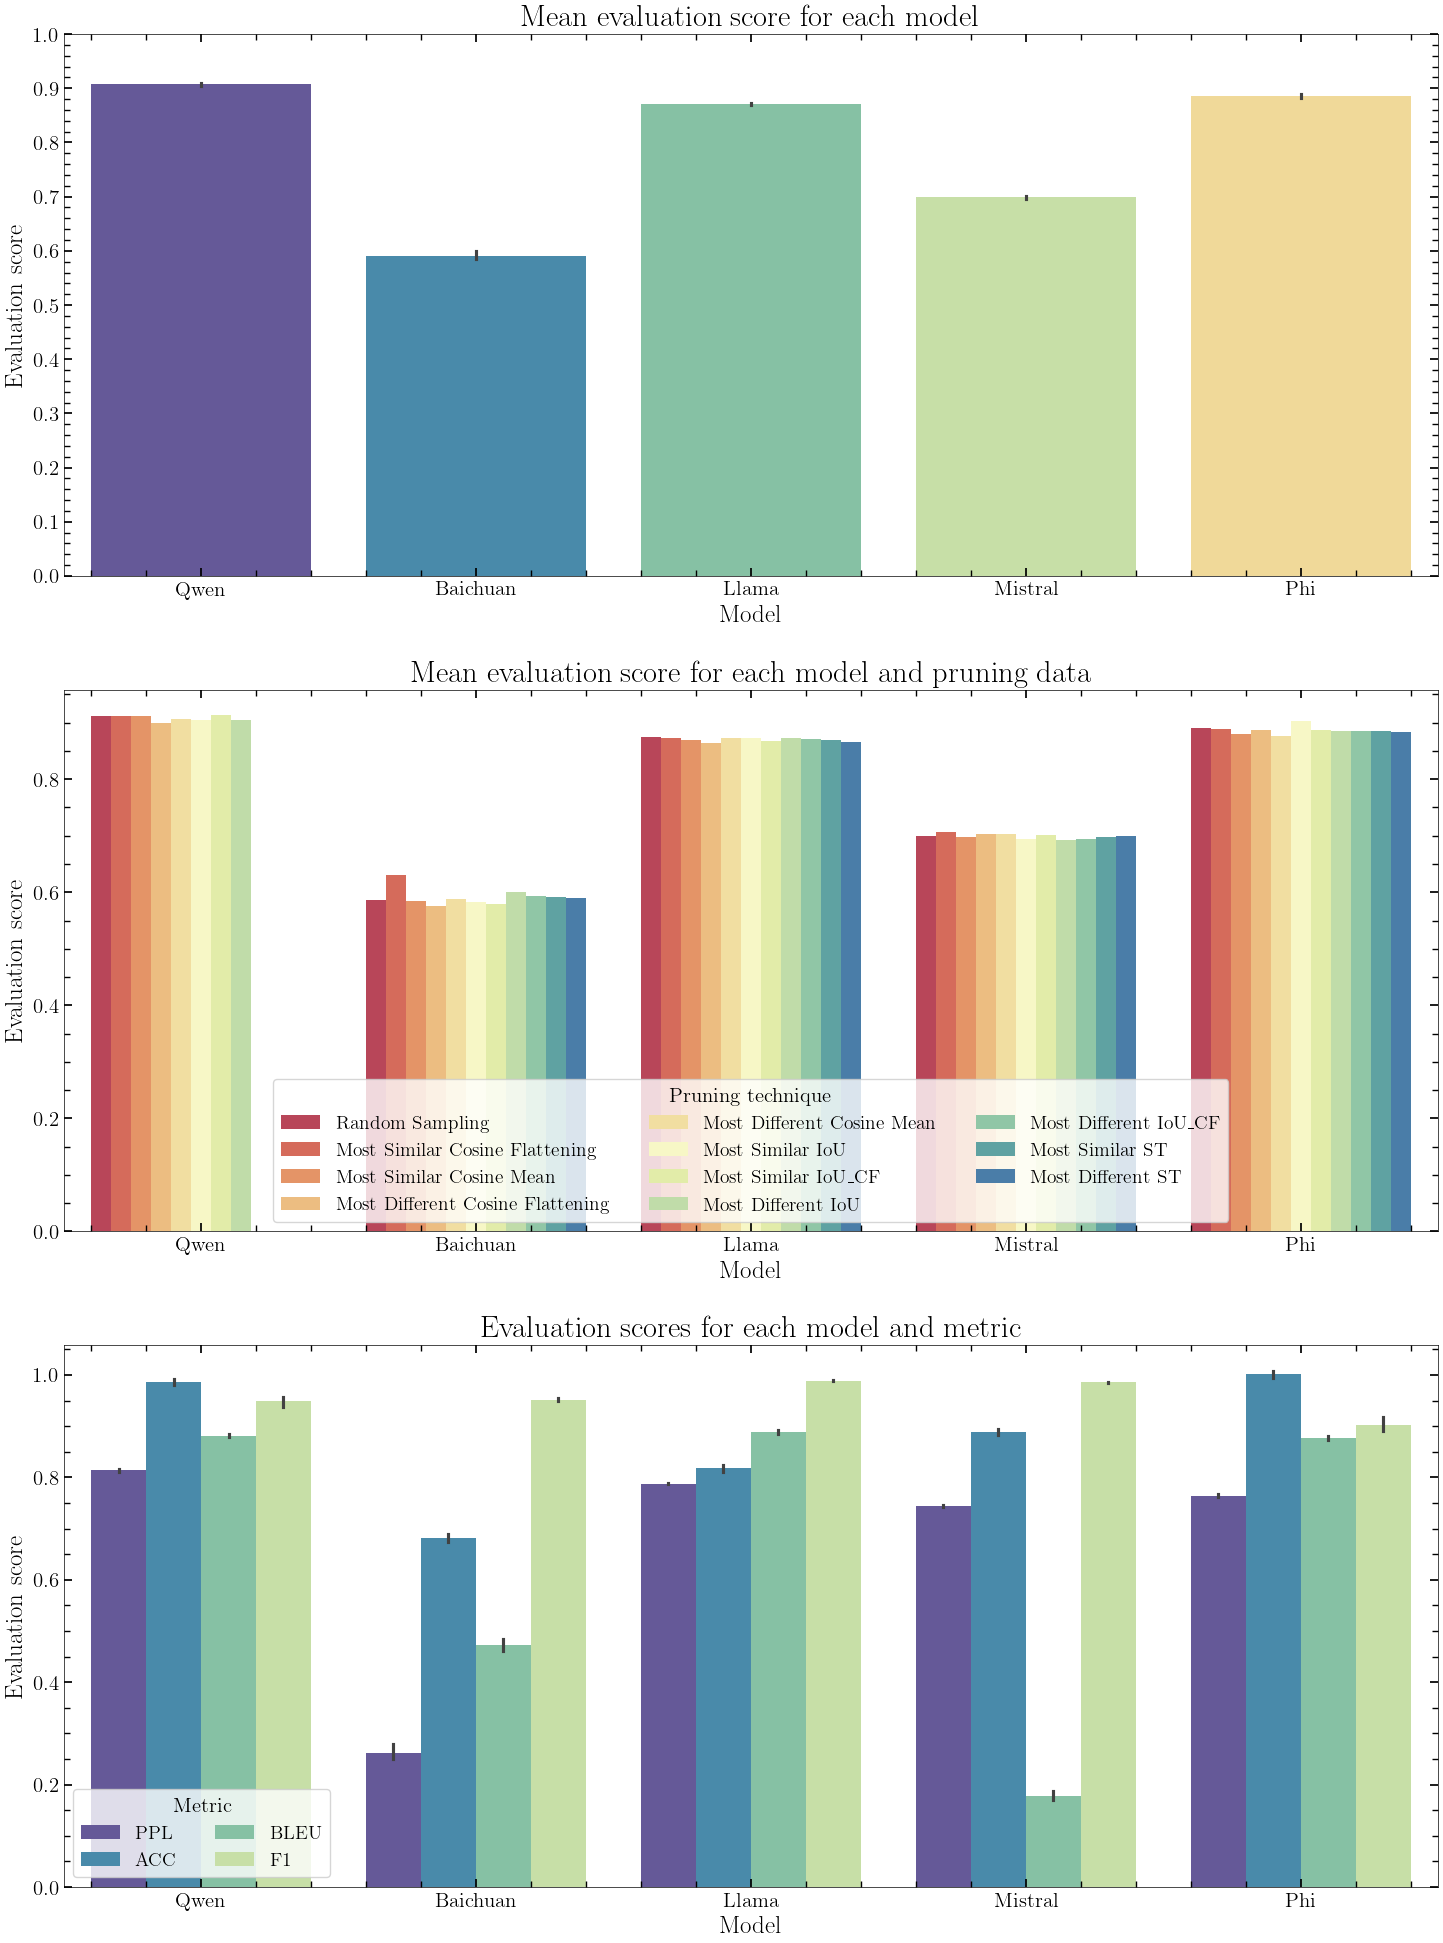

In [15]:
#plot 

figure, ax = plt.subplots(3, figsize=(15, 20))

#calibration_data = ['random_sample', 'prototype_flatten', 'prototype_mean', 'most_different_flatten', 'most_different_mean', 'all_prototype_iou', 'all_prototype_iou_count_occurrence', 'all_most_different_iou', 'all_most_different_iou_count_occurrence', 'all_prototype_st', 'all_most_different_st']
calibration_data = ['Random Sampling', 'Most Similar Cosine Flattening', 'Most Similar Cosine Mean', 'Most Different Cosine Flattening', 'Most Different Cosine Mean', 'Most Similar IoU', 'Most Similar IoU_CF', 'Most Different IoU', 'Most Different IoU_CF', 'Most Similar ST', 'Most Different ST']


#calibration_data = ['random_sample', 'prototype_flatten', 'prototype_mean', 'most_different_flatten', 'most_different_mean']
plot_data["MEAN"] = plot_data[['PPL', 'ACC', 'BLEU', 'F1']].mean(axis=1)


results_plot = plot_data#[(results_multiple_calibration['pruning_data'].isin(calibration_data))]
mean_varie = results_plot.groupby(['pruning_data']).agg(MEAN=('MEAN', 'mean')).reset_index()

sns.barplot(data=results_plot[(results_plot['pruning_data'].isin(calibration_data))], x="model", y="MEAN", ax=ax[0],  palette=custom_palette)
ax[0].set_yticks(np.arange(0, 1.1, 0.1))
ax[0].set_title("Mean evaluation score for each model")
ax[0].set_ylabel("Evaluation score")
ax[0].set_xlabel("Model")

sns.barplot(data=results_plot[(results_plot['pruning_data'].isin(calibration_data))], x="model", y="MEAN", hue="pruning_data", ax=ax[1], palette="Spectral", hue_order=calibration_data)
ax[1].set_title("Mean evaluation score for each model and pruning data")
ax[1].set_ylabel("Evaluation score")
ax[1].set_xlabel("Model")
ax[1].legend(title="Pruning technique", loc='lower center', title_fontsize=15, fontsize=14, ncol=3, frameon=True)

"""
sns.boxplot(data=results_plot, x="pruning_data", y="MEAN", ax=ax[2], palette=custom_palette, order=order_columns_with_mean)
ax[2].set_title("Mean evaluation score for each dataset")
ax[2].set_ylabel("Evaluation score")
ax[2].set_xlabel("Dataset")
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
"""

df_long = results_plot[(results_plot['pruning_data'].isin(calibration_data))].melt(id_vars=['pruning_data', 'model'], 
                  value_vars=['PPL', 'ACC', 'BLEU', 'F1'], 
                  var_name='Metric', 
                  value_name='Value')

sns.barplot(data=df_long, x='model', y='Value', hue='Metric', ax=ax[2], palette=custom_palette, hue_order=['PPL', 'ACC', 'BLEU', 'F1'])
ax[2].set_title("Evaluation scores for each model and metric")
ax[2].set_ylabel("Evaluation score")
ax[2].set_xlabel("Model")
ax[2].legend(title="Metric", loc='lower left', title_fontsize=15, fontsize=14, ncol=2, frameon=True)

#figure.suptitle("Comparison of performance using only ensemble methods", fontsize=25)
figure.tight_layout(pad=2.0)

In [16]:
#Same but task difference instead of metrics

def create_plot_avg_calib(data):
    
    pivot_table = (
    pd.pivot_table(
        data = data.round(precision),
        index='pruning_data',
        values='percentage',
        columns='dataset_group'
        )
        .reindex(order_columns_with_mean, axis=0).reindex(['Language Modeling', 'Mathematical Reasoning', 'NLI', 'Question Answering', 'Translation', 'Coding', 'AVG_across_tasks', 'AVG_across_datasets'], axis=1)
    )
    #pivot_table = pivot_table.T
    
    
    pivot_table_style = (
    pivot_table
        .style
            .set_table_styles([headers,index_style])
            .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
            .highlight_max(axis=0, color="red")
            #.highlight_max(pivot_table.index[1:], axis=0, color="yellow")
            .format(precision=precision)
    )
    
    return pivot_table_style

avg_results = pd.DataFrame()
mean_across_dataset = pd.DataFrame()


for model in results_leave_calibration_out['model'].unique():
    data_this_model = results_leave_calibration_out[(results_leave_calibration_out['model'] == model)]
    data_this_model = data_this_model[~data_this_model['pruning_data'].str.contains('_no_')]

    data_ppl = get_percentage_values(data_this_model[data_this_model['metric'] == 'ppl'], 'ppl')
    data_acc = get_percentage_values(data_this_model[data_this_model['metric'] == 'acc'], 'acc')
    data_bleu = get_percentage_values(data_this_model[data_this_model['metric'] == 'bleu'], 'bleu')
    data_f1 = get_percentage_values(data_this_model[data_this_model['metric'] == 'f1'], 'f1')

    data_ppl_groupped = data_ppl.groupby(['pruning_data', 'dataset_group', 'model']).agg({'percentage': 'mean'}).reset_index()
    data_acc_groupped = data_acc.groupby(['pruning_data', 'dataset_group', 'model']).agg({'percentage': 'mean'}).reset_index() 
    data_bleu_groupped = data_bleu.groupby(['pruning_data', 'dataset_group', 'model']).agg({'percentage': 'mean'}).reset_index() 
    data_f1_groupped = data_f1.groupby(['pruning_data', 'dataset_group', 'model']).agg({'percentage': 'mean'}).reset_index() 

    avg_results = pd.concat([avg_results, data_ppl_groupped, data_acc_groupped, data_bleu_groupped, data_f1_groupped], ignore_index=True)
    mean_across_dataset = pd.concat([mean_across_dataset, data_ppl, data_acc, data_bleu, data_f1], ignore_index=True)


mean_across_dataset = mean_across_dataset.groupby(['pruning_data', 'model']).agg({'percentage': 'mean'}).reset_index()
mean_across_dataset = mean_across_dataset.groupby(['pruning_data']).agg({'percentage': 'mean'}).reset_index()
mean_across_dataset['dataset_group'] = 'AVG_across_datasets'

mean_across_tasks = avg_results.groupby(['pruning_data', 'model']).agg({'percentage': 'mean'}).reset_index()
mean_across_tasks = mean_across_tasks.groupby(['pruning_data']).agg({'percentage': 'mean'}).reset_index()
mean_across_tasks['dataset_group'] = 'AVG_across_tasks'

#Add to the other data
avg_results = pd.concat([avg_results, mean_across_tasks, mean_across_dataset], axis=0)

table = create_plot_avg_calib(avg_results)

print("AVG")
display(table)


AVG


dataset_group,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding,AVG_across_tasks,AVG_across_datasets
pruning_data,,,,,,,,
Dense,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Random Sampling,0.674,0.735,0.939,0.901,0.660,0.959,0.811,0.812
Most Similar Cosine Flattening,0.685,0.744,0.939,0.907,0.674,0.966,0.819,0.820
Most Similar Cosine Mean,0.675,0.714,0.936,0.907,0.653,0.952,0.806,0.809
Most Different Cosine Flattening,0.672,0.696,0.938,0.907,0.657,0.945,0.803,0.806
Most Different Cosine Mean,0.671,0.731,0.936,0.895,0.660,0.953,0.808,0.809
Most Similar IoU,0.670,0.699,0.950,0.895,0.661,0.964,0.806,0.808
Most Similar IoU_CF,0.673,0.687,0.952,0.908,0.657,0.955,0.805,0.809
Most Different IoU,0.674,0.721,0.943,0.899,0.659,0.955,0.808,0.811


<h1>Using multiple pruning dataset</h1>

In [17]:
#Generaliazation
#order_columns_with_mean = ['dense', 'random_sample', 'prototype_flatten', 'prototype_mean', 'most_different_flatten', 'most_different_mean']  + order_columns[1:] #Salto dense
order_columns_with_mean = ['dense', 'random_sample', 'prototype_flatten', 'prototype_mean', 'most_different_flatten', 'most_different_mean', 'all_prototype_iou', 'all_prototype_iou_count_occurrence', 'all_most_different_iou', 'all_most_different_iou_count_occurrence', 'all_prototype_st', 'all_most_different_st']  + order_columns[1:] #Salto dense


#results = pd.read_csv("./results.csv")

results_leave_calibration_out = results.copy() #[results['model'] == "meta-llama/Llama-2-7b-hf"] #meta-llama/Llama-2-7b-hf, mistralai/Mistral-7B-v0.1, microsoft/phi-2, baichuan-inc/Baichuan-7B, Qwen/Qwen2.5-7B
results_leave_calibration_out['percentage'] = pd.NA
results_leave_calibration_out = results_leave_calibration_out[~((results_leave_calibration_out['model'] == 'Baichuan') & (results_leave_calibration_out['dataset'] == 'BoolQ'))]
results_leave_calibration_out = results_leave_calibration_out[~((results_leave_calibration_out['model'] == 'Qwen') & (results_leave_calibration_out['dataset'] == 'RACE'))]
results_leave_calibration_out = results_leave_calibration_out[results_leave_calibration_out['dataset'] != 'GSM8K'] #Attualmente non ha valori sensati

plot_data = pd.DataFrame()


array_generalization = ['No General Most Similar Cosine Flattening', 'No Aritm Most Similar Cosine Flattening', 'No NLU Most Similar Cosine Flattening', 'No Commonsense Most Similar Cosine Flattening', 'No Translation Most Similar Cosine Flattening', 'No Coding Most Similar Cosine Flattening']
#array_generalization = ['all_no_general', 'all_no_aritm', 'all_no_nlu', 'all_no_commonsense', 'all_no_translation', 'all_no_coding']
array_generalization_names = ['Language Modeling', 'Mathematical Reasoning', 'NLI', 'Question Answering', 'Translation', 'Coding']
type = ['prototype', 'mean']
avg = ['flatten', 'mean']


leave_out_array = ['Dense', 'None'] + array_generalization_names

results_leave_calibration_out['leave_out'] = 'null'

for i, gen in enumerate(array_generalization):
    results_leave_calibration_out.loc[results_leave_calibration_out['pruning_data'] == gen, 'leave_out'] = array_generalization_names[i]


results_leave_calibration_out.loc[results_leave_calibration_out['pruning_data'] == 'Dense', 'leave_out'] = 'Dense'


results_leave_calibration_out.loc[results_leave_calibration_out['pruning_data'] == 'Most Similar Cosine Flattening', 'leave_out'] = 'None'

results_leave_calibration_out = results_leave_calibration_out[results_leave_calibration_out['leave_out'] != 'null']

#results_leave_calibration_out.to_csv('results_leave_calibration_out.csv', index=False)


In [18]:
def create_plot_avg_calib(data):
    
    pivot_table = (
    pd.pivot_table(
        data = data.round(precision),
        index='evaluation_dataset',
        columns='leave_out',
        values='MEAN',
        ).reindex(leave_out_array, axis=1).reindex(
            ['Language Modeling', 'Mathematical Reasoning', 'NLI', 'Question Answering', 'Translation', 'Coding', 'Mean'], axis=0
        )
    )
    #pivot_table = pivot_table.T

    pivot_table_style = (
    pivot_table
        .style
            .set_table_styles([headers,index_style])
            .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
            .highlight_min(pivot_table.columns[1:], axis=0, color="yellow")
            .format(precision=precision)
    )
    
    return pivot_table_style


def get_percentage_values_from_none(data, metric):
    
    list_this__dataset = data['dataset'].unique()
    analyze_dataset = []
    for datasetname in list_this__dataset: #Voglio solo i dataset, non anche le medie tra i vari datset (all, all_prototype, ...)
        if datasetname in dataset_list_print:
            analyze_dataset.append(datasetname)
    
    for group_value in analyze_dataset: #analyze_dataset:
        group_mask = data['dataset'] == group_value
        dense_mask = group_mask & (data['leave_out'] == 'None')

        # Estrai valore di riferimento
        ref_rows = data.loc[dense_mask, metric]

        if not ref_rows.empty:
            ref_value = ref_rows.iloc[0]
            # Assegna i valori normalizzati direttamente tramite .loc (modo sicuro)
            if metric == "ppl":
                data.loc[group_mask, 'percentage'] = ref_value / data.loc[group_mask, metric]
            else:
                data.loc[group_mask, 'percentage'] = data.loc[group_mask, metric] / ref_value
        else:
            print(f"Nessuna riga 'dense' per a3 == {group_value}")
            
    return data


avg_results_across_metrics = pd.DataFrame()

for model in results_leave_calibration_out['model'].unique():
    data_this_model = results_leave_calibration_out[results_leave_calibration_out['model'] == model]

    #data_this_model_type_avg = data_this_model[((data_this_model['type'] == t) & (data_this_model['avg'] == a)) | (data_this_model['pruning_data'] == 'Dense') | (data_this_model['pruning_data'] == 'None')]
    data_this_model_type_avg = data_this_model# [(data_this_model['pruning_data'].str.contains('Most Similar Cosine')) | (data_this_model['pruning_data'] == 'Dense') | (data_this_model['pruning_data'] == 'None')]
    data_ppl = get_percentage_values_from_none(data_this_model_type_avg[data_this_model_type_avg['metric'] == 'ppl'], 'ppl')
    data_acc = get_percentage_values_from_none(data_this_model_type_avg[data_this_model_type_avg['metric'] == 'acc'], 'acc')
    data_bleu = get_percentage_values_from_none(data_this_model_type_avg[data_this_model_type_avg['metric'] == 'bleu'], 'bleu')
    data_f1 = get_percentage_values_from_none(data_this_model_type_avg[data_this_model_type_avg['metric'] == 'f1'], 'f1')

    data_ppl = data_ppl.groupby(['leave_out', 'dataset_group', 'model']).agg({'percentage': 'mean'}).reset_index() 
    data_acc = data_acc.groupby(['leave_out', 'dataset_group', 'model']).agg({'percentage': 'mean'}).reset_index() 
    data_bleu = data_bleu.groupby(['leave_out', 'dataset_group', 'model']).agg({'percentage': 'mean'}).reset_index() 
    data_f1 = data_f1.groupby(['leave_out', 'dataset_group', 'model']).agg({'percentage': 'mean'}).reset_index() 

    avg_results_across_metrics = pd.concat([avg_results_across_metrics, data_ppl, data_acc, data_bleu, data_f1])

all_mean_scores = avg_results_across_metrics.groupby(['leave_out', 'dataset_group', 'model']).agg(MEAN=('percentage', 'mean'))
all_mean_scores = avg_results_across_metrics.groupby(['leave_out', 'dataset_group']).agg(MEAN=('percentage', 'mean')).reset_index()

#For each pruning_data, i want also another entry in dataset_group that is 'all' and contains the mean of all dataset_group
all_mean_scores_all = avg_results_across_metrics.groupby(['leave_out', 'model']).agg(MEAN=('percentage', 'mean')).reset_index()
all_mean_scores_all = all_mean_scores_all.groupby(['leave_out']).agg(MEAN=('MEAN', 'mean')).reset_index()

all_mean_scores_all['dataset_group'] = 'Mean'
all_mean_scores = pd.concat([all_mean_scores, all_mean_scores_all], ignore_index=True)

#all_data = pd.concat([mean_ppl, mean_acc, mean_bleu, mean_f1, all_mean_scores], axis=1).reset_index()
#all_data.columns = ['pruning_data', 'PPL', 'ACC', 'BLEU', 'F1', 'MEAN']

all_mean_scores.rename(columns={'dataset_group': 'evaluation_dataset'}, inplace=True)
table = create_plot_avg_calib(all_mean_scores)

print("AVG")
display(table)

AVG


leave_out,Dense,None,Language Modeling,Mathematical Reasoning,NLI,Question Answering,Translation,Coding
evaluation_dataset,,,,,,,,
Language Modeling,1.674,1.000,0.953,0.998,0.993,1.012,0.961,0.961
Mathematical Reasoning,1.461,1.000,0.965,0.950,0.967,0.999,0.986,0.965
NLI,1.081,1.000,0.989,0.978,0.979,0.994,0.991,1.004
Question Answering,1.193,1.000,0.976,0.999,0.993,1.003,0.988,0.964
Translation,2.047,1.000,0.971,1.004,0.976,0.986,0.812,0.979
Coding,1.037,1.000,1.001,0.997,0.993,1.007,0.985,0.968
Mean,1.415,1.000,0.976,0.988,0.983,1.000,0.954,0.974


In [19]:
#order_columns_with_mean = ['dense', 'random_sample', 'prototype_flatten', 'all_no_general_prototype_flatten', 'all_no_aritm_prototype_flatten', 'all_no_nlu_prototype_flatten', 'all_no_commonsense_prototype_flatten', 'all_no_translation_prototype_flatten', 'all_no_coding_prototype_flatten', 'prototype_mean', 'most_different_flatten', 'most_different_mean']#  + order_columns[1:] #Salto dense

order_columns_with_mean = ['Dense', 'Random Sampling', 'Most Similar Cosine Flattening', 'No General Most Similar Cosine Flattening', 'No Aritm Most Similar Cosine Flattening', 'No NLU Most Similar Cosine Flattening', 'No Commonsense Most Similar Cosine Flattening', 'No Translation Most Similar Cosine Flattening', 'No Coding Most Similar Cosine Flattening']

#results = pd.read_csv("./results.csv")

results_leave_calibration_out = results.copy()#[results['model'] == "meta-llama/Llama-2-7b-hf"] #meta-llama/Llama-2-7b-hf, mistralai/Mistral-7B-v0.1, microsoft/phi-2, baichuan-inc/Baichuan-7B, Qwen/Qwen2.5-7B
results_leave_calibration_out['percentage'] = pd.NA

results_leave_calibration_out = results_leave_calibration_out[~((results_leave_calibration_out['model'] == 'Baichuan') & (results_leave_calibration_out['dataset'] == 'BoolQ'))]
results_leave_calibration_out = results_leave_calibration_out[~((results_leave_calibration_out['model'] == 'Qwen') & (results_leave_calibration_out['dataset'] == 'RACE'))]
results_leave_calibration_out = results_leave_calibration_out[results_leave_calibration_out['dataset'] != 'GSM8K'] #Attualmente non ha valori sensati

plot_data = pd.DataFrame()


def create_plot_avg_calib(data):
    
    pivot_table = (
    pd.pivot_table(
        data = data.round(precision),
        index='pruning_data',
        values=['MEAN across DS', 'MEAN across Tasks', 'MEAN across Metrics']
        ).reindex(order_columns_with_mean, axis=0).reindex(
            ['MEAN across DS', 'MEAN across Tasks', 'MEAN across Metrics'], axis=1)
    )
    #pivot_table = pivot_table.T
    pivot_table_style = (
    pivot_table
        .style
            .set_table_styles([headers,index_style])
            .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
            .highlight_max(axis=0, color="red")
            #.highlight_max(pivot_table.index[1:], axis=0, color="yellow")
            .format(precision=precision)
    )
    return pivot_table_style




avg_results_ppl = pd.DataFrame()
avg_results_acc = pd.DataFrame()
avg_results_bleu = pd.DataFrame()
avg_results_f1 = pd.DataFrame()

for model in results_leave_calibration_out['model'].unique():
    data_this_model = results_leave_calibration_out[(results_leave_calibration_out['model'] == model)]
    #data_this_model = data_this_model[~data_this_model['pruning_data'].str.contains('_no_')]

    data_ppl = get_percentage_values(data_this_model[data_this_model['metric'] == 'ppl'], 'ppl')
    data_acc = get_percentage_values(data_this_model[data_this_model['metric'] == 'acc'], 'acc')
    data_bleu = get_percentage_values(data_this_model[data_this_model['metric'] == 'bleu'], 'bleu')
    data_f1 = get_percentage_values(data_this_model[data_this_model['metric'] == 'f1'], 'f1')

    data_ppl = data_ppl.groupby(['pruning_data', 'model']).agg({'percentage': 'mean'}).reset_index()
    data_acc = data_acc.groupby(['pruning_data', 'model']).agg({'percentage': 'mean'}).reset_index() 
    data_bleu = data_bleu.groupby(['pruning_data', 'model']).agg({'percentage': 'mean'}).reset_index() 
    data_f1 = data_f1.groupby(['pruning_data', 'model']).agg({'percentage': 'mean'}).reset_index() 
    
    avg_results_ppl = pd.concat([avg_results_ppl, data_ppl])
    avg_results_acc = pd.concat([avg_results_acc, data_acc])
    avg_results_bleu = pd.concat([avg_results_bleu, data_bleu])
    avg_results_f1 = pd.concat([avg_results_f1, data_f1])
    
    new_data = pd.DataFrame({
        'pruning_data': data_ppl['pruning_data'].to_list(),
        'PPL': data_ppl['percentage'].to_list(),
        'ACC': data_acc['percentage'].to_list(),
        'BLEU': data_bleu['percentage'].to_list(),
        'F1': data_f1['percentage'].to_list(),
        'model': model  # Extract model name from the full model path
    })
    plot_data = pd.concat([plot_data, new_data], ignore_index=True)

mean = avg_results_ppl.groupby(['pruning_data', 'model']).agg(PPL=('percentage', 'mean')).reset_index()
mean = mean.groupby(['pruning_data']).agg(PPL=('PPL', 'mean')).reset_index()

mean_acc = avg_results_acc.groupby(['pruning_data', 'model']).agg(ACC=('percentage', 'mean')).reset_index()
mean_acc = mean_acc.groupby(['pruning_data']).agg(ACC=('ACC', 'mean')).reset_index()

mean_bleu = avg_results_bleu.groupby(['pruning_data', 'model']).agg(BLEU=('percentage', 'mean')).reset_index()
mean_bleu = mean_bleu.groupby(['pruning_data']).agg(BLEU=('BLEU', 'mean')).reset_index()

mean_f1 = avg_results_f1.groupby(['pruning_data', 'model']).agg(F1=('percentage', 'mean')).reset_index()
mean_f1 = mean_f1.groupby(['pruning_data']).agg(F1=('F1', 'mean')).reset_index()


avg_results_across_metrics = pd.DataFrame()

for model in results_leave_calibration_out['model'].unique():
    data_this_model = results_leave_calibration_out[results_leave_calibration_out['model'] == model]
    #data_this_model = data_this_model[~data_this_model['pruning_data'].str.contains('_no_')]
    
    data_ppl = get_percentage_values(data_this_model[data_this_model['metric'] == 'ppl'], 'ppl')
    data_acc = get_percentage_values(data_this_model[data_this_model['metric'] == 'acc'], 'acc')
    data_bleu = get_percentage_values(data_this_model[data_this_model['metric'] == 'bleu'], 'bleu')
    data_f1 = get_percentage_values(data_this_model[data_this_model['metric'] == 'f1'], 'f1')
    
    
    #data_ppl = data_ppl.groupby(['pruning_data']).agg({'percentage': 'mean'}).reset_index()
    #data_acc = data_acc.groupby(['pruning_data']).agg({'percentage': 'mean'}).reset_index() 
    #data_bleu = data_bleu.groupby(['pruning_data']).agg({'percentage': 'mean'}).reset_index() 
    #data_f1 = data_f1.groupby(['pruning_data']).agg({'percentage': 'mean'}).reset_index() 
    avg_results_across_metrics = pd.concat([avg_results_across_metrics, data_ppl, data_acc, data_bleu, data_f1])

#avg_results_across_metrics["pruning_group"] = avg_results_across_metrics["pruning_group"].fillna(avg_results_across_metrics["pruning_data"])

all_mean_scores = avg_results_across_metrics.groupby(['pruning_data', 'model']).agg(MEAN=('percentage', 'mean'))
all_mean_scores = all_mean_scores.groupby(['pruning_data']).agg(MEAN=('MEAN', 'mean'))

all_mean_scores_task = avg_results_across_metrics.groupby(['pruning_data', 'dataset_group', 'model']).agg(MEAN=('percentage', 'mean')).reset_index()
all_mean_scores_task = all_mean_scores_task.groupby(['pruning_data', 'dataset_group']).agg(MEAN=('MEAN', 'mean'))
all_mean_scores_task = all_mean_scores_task.groupby(['pruning_data']).agg(MEAN=('MEAN', 'mean'))

all_mean_scores_metric = avg_results_across_metrics.groupby(['pruning_data', 'metric', 'model']).agg(MEAN=('percentage', 'mean')).reset_index()
all_mean_scores_metric = all_mean_scores_metric.groupby(['pruning_data', 'metric']).agg(MEAN=('MEAN', 'mean'))
all_mean_scores_metric = all_mean_scores_metric.groupby(['pruning_data']).agg(MEAN=('MEAN', 'mean'))


"""
all_data = pd.concat([mean, mean_acc, mean_bleu, mean_f1, all_mean_scores, all_mean_scores_task, all_mean_scores_metric], axis=1).reset_index()
all_data.columns = ['pruning_data', 'PPL', 'ACC', 'BLEU', 'F1', 'MEAN across DS', 'MEAN across Tasks', 'MEAN across Metrics']
"""

all_data = pd.concat([all_mean_scores, all_mean_scores_task, all_mean_scores_metric], axis=1).reset_index()
all_data.columns = ['pruning_data', 'MEAN across DS', 'MEAN across Tasks', 'MEAN across Metrics']


table = create_plot_avg_calib(all_data)


print("AVG")
display(table)

AVG


,MEAN across DS,MEAN across Tasks,MEAN across Metrics
pruning_data,,,
Dense,1.000,1.000,1.000
Random Sampling,0.812,0.811,0.793
Most Similar Cosine Flattening,0.820,0.819,0.802
No General Most Similar Cosine Flattening,0.810,0.809,0.793
No Aritm Most Similar Cosine Flattening,0.814,0.812,0.798
No NLU Most Similar Cosine Flattening,0.812,0.810,0.795
No Commonsense Most Similar Cosine Flattening,0.822,0.820,0.804
No Translation Most Similar Cosine Flattening,0.803,0.798,0.773
No Coding Most Similar Cosine Flattening,0.806,0.806,0.788
